#### –ò–º–æ—Ä–∏—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –±–∏–±–ª–∏–æ—Ç–µ–∫

In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

print("–ë–∏–±–ª–∏–æ—Ç–µ–∫–∏ —É—Å–ø–µ—à–Ω–æ –∑–∞–≥—Ä—É–∂–µ–Ω—ã!")

–ë–∏–±–ª–∏–æ—Ç–µ–∫–∏ —É—Å–ø–µ—à–Ω–æ –∑–∞–≥—Ä—É–∂–µ–Ω—ã!


#### –ó–∞–≥—Ä—É–∑–∫–∞ –∏ –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö

=== –£–õ–£–ß–®–ï–ù–ù–ê–Ø –û–ë–†–ê–ë–û–¢–ö–ê –î–ê–ù–ù–´–• ===
–†–∞–∑–º–µ—Ä –¥–∞–Ω–Ω—ã—Ö –¥–æ –æ–±—Ä–∞–±–æ—Ç–∫–∏: (260640, 10)
–¢–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö:
index                      int64
Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

=== –ê–ù–ê–õ–ò–ó –ü–†–û–ü–£–°–ö–û–í –î–û –û–ë–†–ê–ë–û–¢–ö–ò ===
–ü—Ä–æ–ø—É—Å–∫–∏ –ø–æ —Å—Ç–æ–ª–±—Ü–∞–º:
  Global_active_power: 3771 –ø—Ä–æ–ø—É—Å–∫–æ–≤ (1.45%)
  Global_reactive_power: 3771 –ø—Ä–æ–ø—É—Å–∫–æ–≤ (1.45%)
  Voltage: 3771 –ø—Ä–æ–ø—É—Å–∫–æ–≤ (1.45%)
  Global_intensity: 3771 –ø—Ä–æ–ø—É—Å–∫–æ–≤ (1.45%)
  Sub_metering_1: 3771 –ø—Ä–æ–ø—É—Å–∫–æ–≤ (1.45%)
  Sub_metering_2: 3771 –ø—Ä–æ–ø—É—Å–∫–æ–≤ (1.45%)
  Sub_metering_3: 3771 –ø—Ä–æ–ø—É—Å–∫–æ–≤ (1.45%)
–í –Ω–∞–±–æ—Ä–µ '–ü–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ —ç–ª–µ

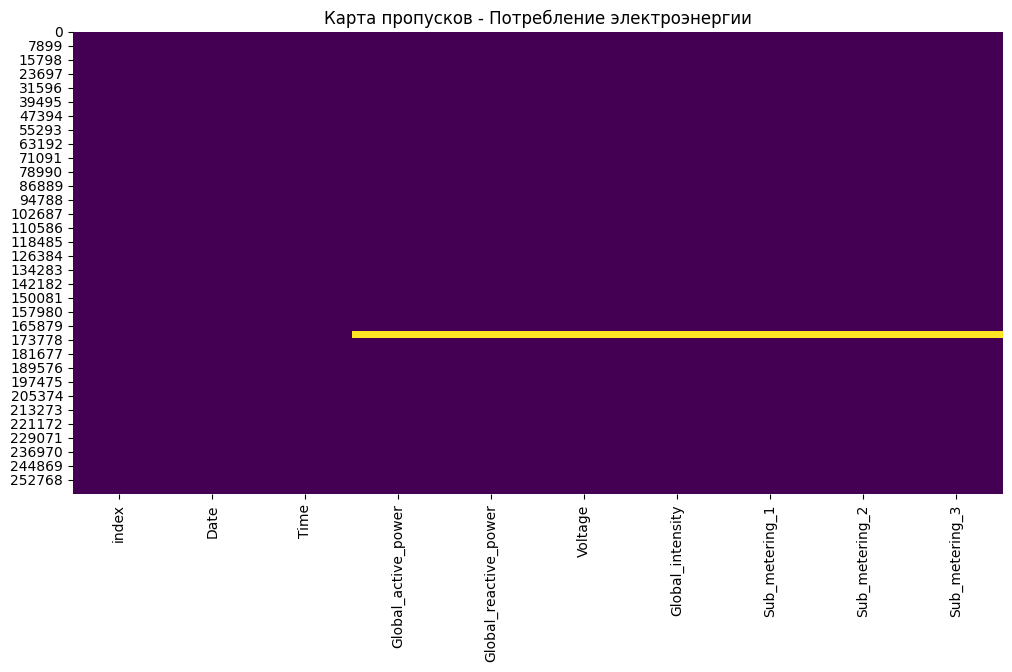

In [294]:
# –£–õ–£–ß–®–ï–ù–ù–ê–Ø –û–ë–†–ê–ë–û–¢–ö–ê –î–ê–ù–ù–´–•
print("=== –£–õ–£–ß–®–ï–ù–ù–ê–Ø –û–ë–†–ê–ë–û–¢–ö–ê –î–ê–ù–ù–´–• ===")

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º –í–°–ï –≤–æ–∑–º–æ–∂–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø—Ä–æ–ø—É—Å–∫–æ–≤
MISSING_VALUES = ['?', '', ' ', 'null', 'NULL', 'NaN', 'nan', 'None', 'N/A', 'n/a', '#N/A', '--', '-', '...', 'NA', 'na', 'NULL', 'Null']

# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö —Å –æ–±—Ä–∞–±–æ—Ç–∫–æ–π –ø—Ä–æ–ø—É—Å–∫–æ–≤
df = pd.read_csv('df/isxod.csv', 
                 na_values=MISSING_VALUES,
                 low_memory=False,
                 dayfirst=True)

print(f"–†–∞–∑–º–µ—Ä –¥–∞–Ω–Ω—ã—Ö –¥–æ –æ–±—Ä–∞–±–æ—Ç–∫–∏: {df.shape}")
print(f"–¢–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö:\n{df.dtypes}")

# –ê–Ω–∞–ª–∏–∑ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –î–û –æ–±—Ä–∞–±–æ—Ç–∫–∏
print(f"\n=== –ê–ù–ê–õ–ò–ó –ü–†–û–ü–£–°–ö–û–í –î–û –û–ë–†–ê–ë–û–¢–ö–ò ===")
missing_before = df.isnull().sum()
print("–ü—Ä–æ–ø—É—Å–∫–∏ –ø–æ —Å—Ç–æ–ª–±—Ü–∞–º:")
for col, count in missing_before.items():
    if count > 0:
        percent = (count / len(df)) * 100
        print(f"  {col}: {count} –ø—Ä–æ–ø—É—Å–∫–æ–≤ ({percent:.2f}%)")


# –ê–Ω–∞–ª–∏–∑ –ø—Ä–æ–ø—É—Å–∫–æ–≤
def analyze_missing_data(dataframe, name):
    missing_total = dataframe.isnull().sum().sum()
    missing_percent = (missing_total / (dataframe.shape[0] * dataframe.shape[1])) * 100
    print(f"–í –Ω–∞–±–æ—Ä–µ '{name}': {missing_total} –ø—Ä–æ–ø—É—Å–∫–æ–≤ ({missing_percent:.2f}%)")
    
    # –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –ø—Ä–æ–ø—É—Å–∫–æ–≤
    plt.figure(figsize=(12, 6))
    sns.heatmap(dataframe.isnull(), cbar=False, cmap='viridis')
    plt.title(f"–ö–∞—Ä—Ç–∞ –ø—Ä–æ–ø—É—Å–∫–æ–≤ - {name}")
    plt.show()

analyze_missing_data(df, "–ü–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ —ç–ª–µ–∫—Ç—Ä–æ—ç–Ω–µ—Ä–≥–∏–∏")

#### –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ 

In [295]:
# –û–ë–†–ê–ë–û–¢–ö–ê –°–¢–†–û–ö–û–í–´–• –î–ê–ù–ù–´–•
print(f"\n=== –û–ë–†–ê–ë–û–¢–ö–ê –°–¢–†–û–ö–û–í–´–• –î–ê–ù–ù–´–• ===")

# –ü—Ä–æ–≤–µ—Ä—è–µ–º —Å—Ç—Ä–æ–∫–æ–≤—ã–µ —Å—Ç–æ–ª–±—Ü—ã
string_columns = df.select_dtypes(include=['object']).columns
print(f"–°—Ç—Ä–æ–∫–æ–≤—ã–µ —Å—Ç–æ–ª–±—Ü—ã: {list(string_columns)}")

# –î–ª—è Date –∏ Time - —É–¥–∞–ª—è–µ–º —Å—Ç—Ä–æ–∫–∏ —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏ (—Ç–∞–∫ –∫–∞–∫ —ç—Ç–æ –∫—Ä–∏—Ç–∏—á–Ω–æ)
initial_count = len(df)
df = df.dropna(subset=['Date', 'Time'])
print(f"–£–¥–∞–ª–µ–Ω–æ —Å—Ç—Ä–æ–∫ —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏ –≤ Date/Time: {initial_count - len(df)}")

# –ü—Ä–æ–≤–µ—Ä—è–µ–º –∫–∞—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
print(f"\n=== –ö–ê–ß–ï–°–¢–í–û –°–¢–†–û–ö–û–í–´–• –î–ê–ù–ù–´–• ===")
for col in string_columns:
    unique_count = df[col].nunique()
    sample_values = df[col].head(3).tolist()
    print(f"{col}: {unique_count} —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π, –ø—Ä–∏–º–µ—Ä—ã: {sample_values}")

# –û–ë–†–ê–ë–û–¢–ö–ê –ß–ò–°–õ–û–í–´–• –î–ê–ù–ù–´–•
print(f"\n=== –û–ë–†–ê–ë–û–¢–ö–ê –ß–ò–°–õ–û–í–´–• –î–ê–ù–ù–´–• ===")
numeric_columns = df.select_dtypes(include=[np.number]).columns

for col in numeric_columns:
    if df[col].isnull().any():
        missing_count = df[col].isnull().sum()
        median_val = df[col].median()
        print(f"  {col}: –∑–∞–ø–æ–ª–Ω—è–µ–º {missing_count} –ø—Ä–æ–ø—É—Å–∫–æ–≤ –º–µ–¥–∏–∞–Ω–æ–π {median_val:.4f}")
        df[col] = df[col].fillna(median_val)

# –ê–Ω–∞–ª–∏–∑ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –ü–û–°–õ–ï –æ–±—Ä–∞–±–æ—Ç–∫–∏
print(f"\n=== –†–ï–ó–£–õ–¨–¢–ê–¢–´ –û–ë–†–ê–ë–û–¢–ö–ò ===")
missing_after = df.isnull().sum().sum()
print(f"–û—Å—Ç–∞–ª–æ—Å—å –ø—Ä–æ–ø—É—Å–∫–æ–≤ –ø–æ—Å–ª–µ –æ–±—Ä–∞–±–æ—Ç–∫–∏: {missing_after}")
print(f"–§–∏–Ω–∞–ª—å–Ω—ã–π —Ä–∞–∑–º–µ—Ä –¥–∞–Ω–Ω—ã—Ö: {df.shape}")

# –ü—Ä–æ–≤–µ—Ä—è–µ–º –∞–Ω–æ–º–∞–ª–∏–∏ –≤ —á–∏—Å–ª–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
print(f"\n=== –ü–†–û–í–ï–†–ö–ê –ê–ù–û–ú–ê–õ–ò–ô ===")
for col in numeric_columns:
    if col != 'index':  # –ü—Ä–æ–ø—É—Å–∫–∞–µ–º –∏–Ω–¥–µ–∫—Å
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        if len(outliers) > 0:
            print(f"  {col}: {len(outliers)} –≤—ã–±—Ä–æ—Å–æ–≤ ({len(outliers)/len(df)*100:.2f}%)")


=== –û–ë–†–ê–ë–û–¢–ö–ê –°–¢–†–û–ö–û–í–´–• –î–ê–ù–ù–´–• ===
–°—Ç—Ä–æ–∫–æ–≤—ã–µ —Å—Ç–æ–ª–±—Ü—ã: ['Date', 'Time']
–£–¥–∞–ª–µ–Ω–æ —Å—Ç—Ä–æ–∫ —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏ –≤ Date/Time: 0

=== –ö–ê–ß–ï–°–¢–í–û –°–¢–†–û–ö–û–í–´–• –î–ê–ù–ù–´–• ===
Date: 181 —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π, –ø—Ä–∏–º–µ—Ä—ã: ['1/1/07', '1/1/07', '1/1/07']
Time: 1440 —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π, –ø—Ä–∏–º–µ—Ä—ã: ['0:00:00', '0:01:00', '0:02:00']

=== –û–ë–†–ê–ë–û–¢–ö–ê –ß–ò–°–õ–û–í–´–• –î–ê–ù–ù–´–• ===
  Global_active_power: –∑–∞–ø–æ–ª–Ω—è–µ–º 3771 –ø—Ä–æ–ø—É—Å–∫–æ–≤ –º–µ–¥–∏–∞–Ω–æ–π 0.5640
  Global_reactive_power: –∑–∞–ø–æ–ª–Ω—è–µ–º 3771 –ø—Ä–æ–ø—É—Å–∫–æ–≤ –º–µ–¥–∏–∞–Ω–æ–π 0.1040
  Voltage: –∑–∞–ø–æ–ª–Ω—è–µ–º 3771 –ø—Ä–æ–ø—É—Å–∫–æ–≤ –º–µ–¥–∏–∞–Ω–æ–π 239.6100
  Global_intensity: –∑–∞–ø–æ–ª–Ω—è–µ–º 3771 –ø—Ä–æ–ø—É—Å–∫–æ–≤ –º–µ–¥–∏–∞–Ω–æ–π 2.6000
  Sub_metering_1: –∑–∞–ø–æ–ª–Ω—è–µ–º 3771 –ø—Ä–æ–ø—É—Å–∫–æ–≤ –º–µ–¥–∏–∞–Ω–æ–π 0.0000
  Sub_metering_2: –∑–∞–ø–æ–ª–Ω—è–µ–º 3771 –ø—Ä–æ–ø—É—Å–∫–æ–≤ –º–µ–¥–∏–∞–Ω–æ–

–í –Ω–∞–±–æ—Ä–µ '–ü–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ —ç–ª–µ–∫—Ç—Ä–æ—ç–Ω–µ—Ä–≥–∏–∏': 0 –ø—Ä–æ–ø—É—Å–∫–æ–≤ (0.00%)


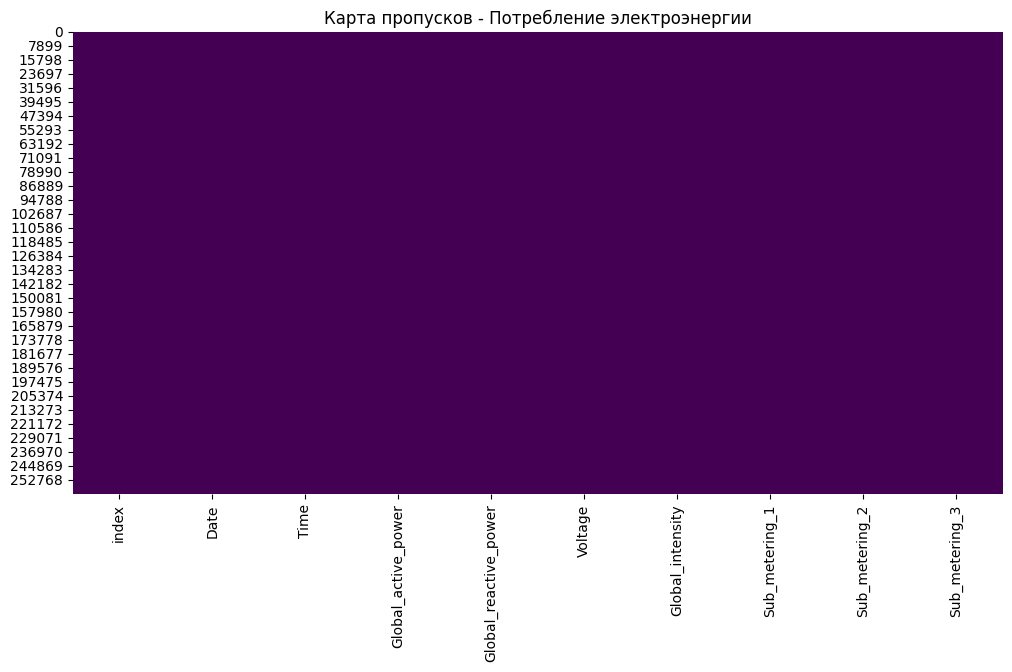

In [296]:
analyze_missing_data(df, "–ü–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ —ç–ª–µ–∫—Ç—Ä–æ—ç–Ω–µ—Ä–≥–∏–∏")

In [297]:
# –°–æ–∑–¥–∞–µ–º datetime –∏–Ω–¥–µ–∫—Å –° –ü–†–ê–í–ò–õ–¨–ù–´–ú –§–û–†–ú–ê–¢–û–ú
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)  # –î–û–ë–ê–í–õ–ï–ù–û dayfirst=True
df = df.set_index('datetime')

# –£–¥–∞–ª—è–µ–º –∏—Å—Ö–æ–¥–Ω—ã–µ —Å—Ç–æ–ª–±—Ü—ã –¥–∞—Ç—ã –∏ –≤—Ä–µ–º–µ–Ω–∏
df = df.drop(['Date', 'Time'], axis=1)

# –£–¥–∞–ª—è–µ–º —Å—Ç–æ–ª–±–µ—Ü 'index' - —Ç–µ–ø–µ—Ä—å datetime –∏–Ω–¥–µ–∫—Å
df = df.drop('index', axis=1)

# –ü—Ä–æ–≤–µ—Ä—è–µ–º –ø—Ä–∞–≤–∏–ª—å–Ω–æ—Å—Ç—å —Ä–∞—Å–ø–æ–∑–Ω–∞–≤–∞–Ω–∏—è –¥–∞—Ç –ß–ï–†–ï–ó –ò–ù–î–ï–ö–°
print("–ü–†–û–í–ï–†–ö–ê –î–ê–¢:")
print(f"–ù–∞—á–∞–ª–æ –¥–∞–Ω–Ω—ã—Ö: {df.index.min()}")  # –ò–°–ü–†–ê–í–õ–ï–ù–û: –æ–±—Ä–∞—â–∞–µ–º—Å—è –∫ –∏–Ω–¥–µ–∫—Å—É
print(f"–ö–æ–Ω–µ—Ü –¥–∞–Ω–Ω—ã—Ö: {df.index.max()}")    # –ò–°–ü–†–ê–í–õ–ï–ù–û: –æ–±—Ä–∞—â–∞–µ–º—Å—è –∫ –∏–Ω–¥–µ–∫—Å—É
print(f"–†–µ–∞–ª—å–Ω—ã–µ –º–µ—Å—è—Ü—ã –≤ –¥–∞–Ω–Ω—ã—Ö: {sorted(df.index.month.unique())}")  # –ò–°–ü–†–ê–í–õ–ï–ù–û: —á–µ—Ä–µ–∑ –∏–Ω–¥–µ–∫—Å

print("–í—Ä–µ–º–µ–Ω–Ω–æ–π –∏–Ω–¥–µ–∫—Å datetime —Å–æ–∑–¥–∞–Ω")
print(f"–î–∏–∞–ø–∞–∑–æ–Ω –¥–∞–Ω–Ω—ã—Ö: –æ—Ç {df.index.min()} –¥–æ {df.index.max()}")

–ü–†–û–í–ï–†–ö–ê –î–ê–¢:
–ù–∞—á–∞–ª–æ –¥–∞–Ω–Ω—ã—Ö: 2007-01-01 00:00:00
–ö–æ–Ω–µ—Ü –¥–∞–Ω–Ω—ã—Ö: 2007-06-30 23:59:00
–†–µ–∞–ª—å–Ω—ã–µ –º–µ—Å—è—Ü—ã –≤ –¥–∞–Ω–Ω—ã—Ö: [1, 2, 3, 4, 5, 6]
–í—Ä–µ–º–µ–Ω–Ω–æ–π –∏–Ω–¥–µ–∫—Å datetime —Å–æ–∑–¥–∞–Ω
–î–∏–∞–ø–∞–∑–æ–Ω –¥–∞–Ω–Ω—ã—Ö: –æ—Ç 2007-01-01 00:00:00 –¥–æ 2007-06-30 23:59:00


In [298]:
# –°–æ–∑–¥–∞–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ –≤—Ä–µ–º–µ–Ω–∏ (–≤–∞–∂–Ω–æ –¥–ª—è —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏)

df['hour'] = df.index.hour # (0-23)
# –ü—Ä–∏–º–µ—Ä: 
# 0 = –ø–æ–ª–Ω–æ—á—å, 12 = –ø–æ–ª–¥–µ–Ω—å, 18 = 6 –≤–µ—á–µ—Ä–∞
# –ù—É–∂–µ–Ω —á—Ç–æ–±—ã –º–æ–¥–µ–ª—å –ø–æ–Ω–∏–º–∞–ª–∞ "–Ω–æ—á–Ω—ã–µ –ø—Ä–æ–≤–∞–ª—ã" –∏ "–¥–Ω–µ–≤–Ω—ã–µ –ø–∏–∫–∏"
# –ó–∞—á–µ–º: –≠–Ω–µ—Ä–≥–æ–ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ —Å–∏–ª—å–Ω–æ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç –≤—Ä–µ–º–µ–Ω–∏ —Å—É—Ç–æ–∫


df['day_of_week'] = df.index.dayofweek # (0-6)
# 0 = –ø–æ–Ω–µ–¥–µ–ª—å–Ω–∏–∫, 1 = –≤—Ç–æ—Ä–Ω–∏–∫, ..., 6 = –≤–æ—Å–∫—Ä–µ—Å–µ–Ω—å–µ
# –í –¥–∞–Ω–Ω—ã—Ö: [0 3 6 1 4 2 5] - —ç—Ç–æ –ø—Ä–æ—Å—Ç–æ –ø–æ—Ä—è–¥–æ–∫ –¥–Ω–µ–π
# –ó–∞—á–µ–º: –ü–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ –≤ –≤—ã—Ö–æ–¥–Ω—ã–µ –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è –æ—Ç —Ä–∞–±–æ—á–∏—Ö –¥–Ω–µ–π


df['month'] = df.index.month # (1-12)
# 1 = —è–Ω–≤–∞—Ä—å, 12 = –¥–µ–∫–∞–±—Ä—å
# –ó–∏–º–æ–π - –æ—Ç–æ–ø–ª–µ–Ω–∏–µ, –ª–µ—Ç–æ–º - –∫–æ–Ω–¥–∏—Ü–∏–æ–Ω–µ—Ä—ã
# –ó–∞—á–µ–º: –£—á–µ—Å—Ç—å —Å–µ–∑–æ–Ω–Ω—ã–µ –∏–∑–º–µ–Ω–µ–Ω–∏—è (–æ—Ç–æ–ø–ª–µ–Ω–∏–µ/–∫–æ–Ω–¥–∏—Ü–∏–æ–Ω–∏—Ä–æ–≤–∞–Ω–∏–µ)


df['is_weekend'] = (df.index.dayofweek >= 5).astype(int) # (0 –∏–ª–∏ 1)
# 0 = —Ä–∞–±–æ—á–∏–π –¥–µ–Ω—å, 1 = —Å—É–±–±–æ—Ç–∞/–≤–æ—Å–∫—Ä–µ—Å–µ–Ω—å–µ
# –£–ø—Ä–æ—â–µ–Ω–Ω–∞—è –≤–µ—Ä—Å–∏—è day_of_week
# –ó–∞—á–µ–º: –ë—ã—Å—Ç—Ä–æ –≤—ã–¥–µ–ª–∏—Ç—å –≤—ã—Ö–æ–¥–Ω—ã–µ –¥–Ω–∏


df['is_morning_peak'] = ((df['hour'] >= 7) & (df['hour'] <= 9)).astype(int) # (0 –∏–ª–∏ 1)
# 0 = –Ω–µ —É—Ç—Ä–µ–Ω–Ω–∏–π –ø–∏–∫, 1 = —É—Ç—Ä–µ–Ω–Ω–∏–π –ø–∏–∫ (7:00-9:00)
# –ü—Ä–∏–º–µ—Ä: 7:00 - –ø—Ä–æ–±—É–∂–¥–µ–Ω–∏–µ, –∑–∞–≤—Ç—Ä–∞–∫, —Å–±–æ—Ä—ã –Ω–∞ —Ä–∞–±–æ—Ç—É
# –ó–∞—á–µ–º: –í—ã–¥–µ–ª–∏—Ç—å –ø–µ—Ä–∏–æ–¥—ã –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–≥–æ —É—Ç—Ä–µ–Ω–Ω–µ–≥–æ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è


df['is_evening_peak'] = ((df['hour'] >= 18) & (df['hour'] <= 22)).astype(int) # (0 –∏–ª–∏ 1)
# 0 = –Ω–µ –≤–µ—á–µ—Ä–Ω–∏–π –ø–∏–∫, 1 = –≤–µ—á–µ—Ä–Ω–∏–π –ø–∏–∫ (18:00-22:00) 
# –ü—Ä–∏–º–µ—Ä: 19:00 - –≤–æ–∑–≤—Ä–∞—â–µ–Ω–∏–µ —Å —Ä–∞–±–æ—Ç—ã, —É–∂–∏–Ω, —Ç–µ–ª–µ–≤–∏–∑–æ—Ä
# –ó–∞—á–µ–º: –í—ã–¥–µ–ª–∏—Ç—å –ø–µ—Ä–∏–æ–¥—ã –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–≥–æ –≤–µ—á–µ—Ä–Ω–µ–≥–æ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è


df['is_night'] = ((df['hour'] >= 0) & (df['hour'] <= 5)).astype(int) # (0 –∏–ª–∏ 1)
# 0 = –Ω–µ –Ω–æ—á–Ω–æ–µ –≤—Ä–µ–º—è, 1 = –Ω–æ—á–Ω–æ–µ –≤—Ä–µ–º—è (0:00-5:00)
# –ü—Ä–∏–º–µ—Ä: 3:00 - –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –ª—é–¥–µ–π —Å–ø–∏—Ç, –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ
# –ó–∞—á–µ–º: –í—ã–¥–µ–ª–∏—Ç—å –ø–µ—Ä–∏–æ–¥—ã –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–≥–æ –Ω–æ—á–Ω–æ–≥–æ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è

print("–í—Ä–µ–º–µ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å–æ–∑–¥–∞–Ω—ã:")
print(f"–ß–∞—Å—ã: {df['hour'].unique()}")
print(f"–î–Ω–∏ –Ω–µ–¥–µ–ª–∏: {df['day_of_week'].unique()}")
print(f"–ú–µ—Å—è—Ü—ã: {sorted(df['month'].unique())}")

–í—Ä–µ–º–µ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å–æ–∑–¥–∞–Ω—ã:
–ß–∞—Å—ã: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
–î–Ω–∏ –Ω–µ–¥–µ–ª–∏: [0 1 2 3 4 5 6]
–ú–µ—Å—è—Ü—ã: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6)]


In [299]:
df.sample(5)

Global_active_power  Global_reactive_power  Voltage  \
datetime                                                                   
2007-03-01 21:39:00                0.292                  0.102   238.54   
2007-05-03 23:30:00                1.228                  0.062   237.37   
2007-06-05 08:33:00                1.260                  0.086   230.95   
2007-04-05 23:39:00                1.524                  0.188   241.46   
2007-04-06 16:45:00                0.264                  0.000   242.51   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
datetime                                                                
2007-03-01 21:39:00               1.2             0.0             2.0   
2007-05-03 23:30:00               5.2             0.0             0.0   
2007-06-05 08:33:00               5.4             0.0             1.0   
2007-04-05 23:39:00               6.2             0.0             0.0   
2007-04-06 16:45:00               1.0             0.0             0.0   

                     Sub_metering_3  hour  day_of_week  month  is_weekend  \
datetime                                                                    
2007-03-01 21:39:00             0.0    21            3      3           0   
2007-05-03 23:30:00            17.0    23            3      5           0   
2007-06-05 08:33:00            16.0     8            1      6           0   
2007-04-05 23:39:00            17.0    23            3      4           0   
2007-04-06 16:45:00             0.0    16            4      4           0   

                     is_morning_peak  is_evening_peak  is_night  
datetime                                                         
2007-03-01 21:39:00                0                1         0  
2007-05-03 23:30:00                0                0         0  
2007-06-05 08:33:00                1                0         0  
2007-04-05 23:39:00                0                0         0  
2007-04-06 16:45:00                0                0         0

##### –û–ø–∏—Å–∞–Ω–∏–µ —Å—Ç–æ–ª–±—Ü–æ–≤ –¥–∞—Ç–∞—Å–µ—Ç–∞

| –°—Ç–æ–ª–±–µ—Ü | –¢–∏–ø –¥–∞–Ω–Ω—ã—Ö | –û–ø–∏—Å–∞–Ω–∏–µ |
|---------|------------|-----------|
| **datetime** | DateTime | –í—Ä–µ–º–µ–Ω–Ω–∞—è –º–µ—Ç–∫–∞ (–æ—Å–Ω–æ–≤–Ω–æ–π –∏–Ω–¥–µ–∫—Å) |
| **Global_active_power** | float64 | –û–±—â–∞—è –∞–∫—Ç–∏–≤–Ω–∞—è –º–æ—â–Ω–æ—Å—Ç—å (–∫–í—Ç) - **—Ü–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è** |
| **Global_reactive_power** | float64 | –û–±—â–∞—è —Ä–µ–∞–∫—Ç–∏–≤–Ω–∞—è –º–æ—â–Ω–æ—Å—Ç—å (–∫–í—Ç) |
| **Voltage** | float64 | –ù–∞–ø—Ä—è–∂–µ–Ω–∏–µ –≤ —Å–µ—Ç–∏ (–í) |
| **Global_intensity** | float64 | –û–±—â–∞—è —Å–∏–ª–∞ —Ç–æ–∫–∞ (–ê) |
| **Sub_metering_1** | float64 | –ü–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ –∫—É—Ö–Ω–∏ (–∫–í—Ç) |
| **Sub_metering_2** | float64 | –ü–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ –ø—Ä–∞—á–µ—á–Ω–æ–π (–∫–í—Ç) |
| **Sub_metering_3** | float64 | –ü–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ —Å–∏—Å—Ç–µ–º –æ—Ç–æ–ø–ª–µ–Ω–∏—è/–æ—Ö–ª–∞–∂–¥–µ–Ω–∏—è (–∫–í—Ç) |
| **hour** | int32 | –ß–∞—Å –¥–Ω—è (0-23) - **–≤—Ä–µ–º–µ–Ω–Ω–æ–π –ø—Ä–∏–∑–Ω–∞–∫** |
| **day_of_week** | int32 | –î–µ–Ω—å –Ω–µ–¥–µ–ª–∏ (0=–ø–Ω, 6=–≤—Å) - **–≤—Ä–µ–º–µ–Ω–Ω–æ–π –ø—Ä–∏–∑–Ω–∞–∫** |
| **month** | int32 | –ú–µ—Å—è—Ü –≥–æ–¥–∞ (1-12) - **–≤—Ä–µ–º–µ–Ω–Ω–æ–π –ø—Ä–∏–∑–Ω–∞–∫** |
| **is_weekend** | int32 | –ü—Ä–∏–∑–Ω–∞–∫ –≤—ã—Ö–æ–¥–Ω–æ–≥–æ –¥–Ω—è (0=—Ä–∞–±–æ—á–∏–π, 1=–≤—ã—Ö–æ–¥–Ω–æ–π) - **–≤—Ä–µ–º–µ–Ω–Ω–æ–π –ø—Ä–∏–∑–Ω–∞–∫** |
| **is_morning_peak** | int32 | –£—Ç—Ä–µ–Ω–Ω–∏–π –ø–∏–∫ (7:00-9:00) - **–≤—Ä–µ–º–µ–Ω–Ω–æ–π –ø—Ä–∏–∑–Ω–∞–∫** |
| **is_evening_peak** | int32 | –í–µ—á–µ—Ä–Ω–∏–π –ø–∏–∫ (18:00-22:00) - **–≤—Ä–µ–º–µ–Ω–Ω–æ–π –ø—Ä–∏–∑–Ω–∞–∫** |
| **is_night** | int32 | –ù–æ—á–Ω–æ–µ –≤—Ä–µ–º—è (0:00-5:00) - **–≤—Ä–µ–º–µ–Ω–Ω–æ–π –ø—Ä–∏–∑–Ω–∞–∫** |

##### –ö–ª—é—á–µ–≤—ã–µ –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç–∏:
- üéØ **Global_active_power** - –æ—Å–Ω–æ–≤–Ω–∞—è —Ü–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è –¥–ª—è –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è
- ‚è∞ **–í—Ä–µ–º–µ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏** —Å–æ–∑–¥–∞–Ω—ã –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏ –∏ —Ü–∏–∫–ª–∏—á–Ω–æ—Å—Ç–∏ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è
- üïí **–ü–∏–∫–æ–≤—ã–µ –ø–µ—Ä–∏–æ–¥—ã** –≤—ã–¥–µ–ª–µ–Ω—ã –¥–ª—è –ª—É—á—à–µ–≥–æ –ø–æ–Ω–∏–º–∞–Ω–∏—è –ø–∞—Ç—Ç–µ—Ä–Ω–æ–≤ –Ω–∞–≥—Ä—É–∑–∫–∏
- üìä –î–∞–Ω–Ω—ã–µ —Å–æ–±—Ä–∞–Ω—ã —Å –º–∏–Ω—É—Ç–Ω—ã–º –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–º (–≤—ã—Å–æ–∫–∞—è –¥–µ—Ç–∞–ª–∏–∑–∞—Ü–∏—è)
- üè† **Sub_metering** –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ –ø–æ –∑–æ–Ω–∞–º –¥–æ–º–∞ (–∫—É—Ö–Ω—è, –ø—Ä–∞—á–µ—á–Ω–∞—è, —Å–∏—Å—Ç–µ–º—ã –∫–ª–∏–º–∞—Ç-–∫–æ–Ω—Ç—Ä–æ–ª—è)
- ‚ö° –≠–Ω–µ—Ä–≥–µ—Ç–∏—á–µ—Å–∫–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –≤–∑–∞–∏–º–æ—Å–≤—è–∑–∞–Ω—ã (–º–æ—â–Ω–æ—Å—Ç—å, –Ω–∞–ø—Ä—è–∂–µ–Ω–∏–µ, —Ç–æ–∫)
- üìà **–°–µ–∑–æ–Ω–Ω—ã–µ –ø–∞—Ç—Ç–µ—Ä–Ω—ã** —É—á—Ç–µ–Ω—ã —á–µ—Ä–µ–∑ –º–µ—Å—è—á–Ω—ã–µ –∏ –Ω–µ–¥–µ–ª—å–Ω—ã–µ —Ü–∏–∫–ª—ã
- üåô **–°—É—Ç–æ—á–Ω—ã–µ —Ü–∏–∫–ª—ã** –≤—ã–¥–µ–ª–µ–Ω—ã —á–µ—Ä–µ–∑ —á–∞—Å—ã –∏ –ø–∏–∫–æ–≤—ã–µ –ø–µ—Ä–∏–æ–¥—ã

In [300]:
# –°–æ—Ö—Ä–∞–Ω—è–µ–º –æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ
df.to_csv('df/obr.csv')
print("–û–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ 'df/obr.csv'")

# –¢–∞–∫–∂–µ —Å–æ—Ö—Ä–∞–Ω–∏–º sample –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏
sample_df = df.sample(300)  # 300 —Å–ª—É—á–∞–π–Ω—ã—Ö —Å—Ç—Ä–æ–∫
sample_df.to_csv('df/obr_sample.csv')
print("Sample –¥–∞–Ω–Ω—ã—Ö —Å–æ—Ö—Ä–∞–Ω–µ–Ω –≤ 'df/obr_sample.csv'")

# –ü—Ä–æ–≤–µ—Ä–∏–º —Ä–∞–∑–º–µ—Ä —Å–æ—Ö—Ä–∞–Ω–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
print(f"\n–†–∞–∑–º–µ—Ä –ø–æ–ª–Ω–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞: {df.shape}")
print(f"–†–∞–∑–º–µ—Ä sample: {sample_df.shape}")

–û–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ 'df/obr.csv'
Sample –¥–∞–Ω–Ω—ã—Ö —Å–æ—Ö—Ä–∞–Ω–µ–Ω –≤ 'df/obr_sample.csv'

–†–∞–∑–º–µ—Ä –ø–æ–ª–Ω–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞: (260640, 14)
–†–∞–∑–º–µ—Ä sample: (300, 14)


#### –ê–Ω–∞–ª–∏–∑


–î–ï–¢–ê–õ–¨–ù–´–ô –ê–ù–ê–õ–ò–ó –î–ê–ù–ù–´–• –° –ß–ò–°–õ–û–í–´–ú–ò –ó–ù–ê–ß–ï–ù–ò–Ø–ú–ò

=== –†–ê–°–ü–†–ï–î–ï–õ–ï–ù–ò–ï –ü–û –ß–ê–°–ê–ú ===
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π –ø–æ —á–∞—Å–∞–º:
  –ß–∞—Å  0:  10860 –∑–∞–ø–∏—Å–µ–π
  –ß–∞—Å  1:  10860 –∑–∞–ø–∏—Å–µ–π
  –ß–∞—Å  2:  10860 –∑–∞–ø–∏—Å–µ–π
  –ß–∞—Å  3:  10860 –∑–∞–ø–∏—Å–µ–π
  –ß–∞—Å  4:  10860 –∑–∞–ø–∏—Å–µ–π
  –ß–∞—Å  5:  10860 –∑–∞–ø–∏—Å–µ–π
  –ß–∞—Å  6:  10860 –∑–∞–ø–∏—Å–µ–π
  –ß–∞—Å  7:  10860 –∑–∞–ø–∏—Å–µ–π
  –ß–∞—Å  8:  10860 –∑–∞–ø–∏—Å–µ–π
  –ß–∞—Å  9:  10860 –∑–∞–ø–∏—Å–µ–π
  –ß–∞—Å 10:  10860 –∑–∞–ø–∏—Å–µ–π
  –ß–∞—Å 11:  10860 –∑–∞–ø–∏—Å–µ–π
  –ß–∞—Å 12:  10860 –∑–∞–ø–∏—Å–µ–π
  –ß–∞—Å 13:  10860 –∑–∞–ø–∏—Å–µ–π
  –ß–∞—Å 14:  10860 –∑–∞–ø–∏—Å–µ–π
  –ß–∞—Å 15:  10860 –∑–∞–ø–∏—Å–µ–π
  –ß–∞—Å 16:  10860 –∑–∞–ø–∏—Å–µ–π
  –ß–∞—Å 17:  10860 –∑–∞–ø–∏—Å–µ–π
  –ß–∞—Å 18:  10860 –∑–∞–ø–∏—Å–µ–π
  –ß–∞—Å 19:  10860 –∑–∞–ø–∏—Å–µ–π
  –ß–∞—Å 20:  10860 –∑–∞–ø–∏—Å–µ–π
  –ß–∞—Å 21:  10860 –∑–∞–ø–∏—Å–µ–π
  –ß–∞—Å 22:  10860 –∑–∞–ø–∏—Å–µ–π
 

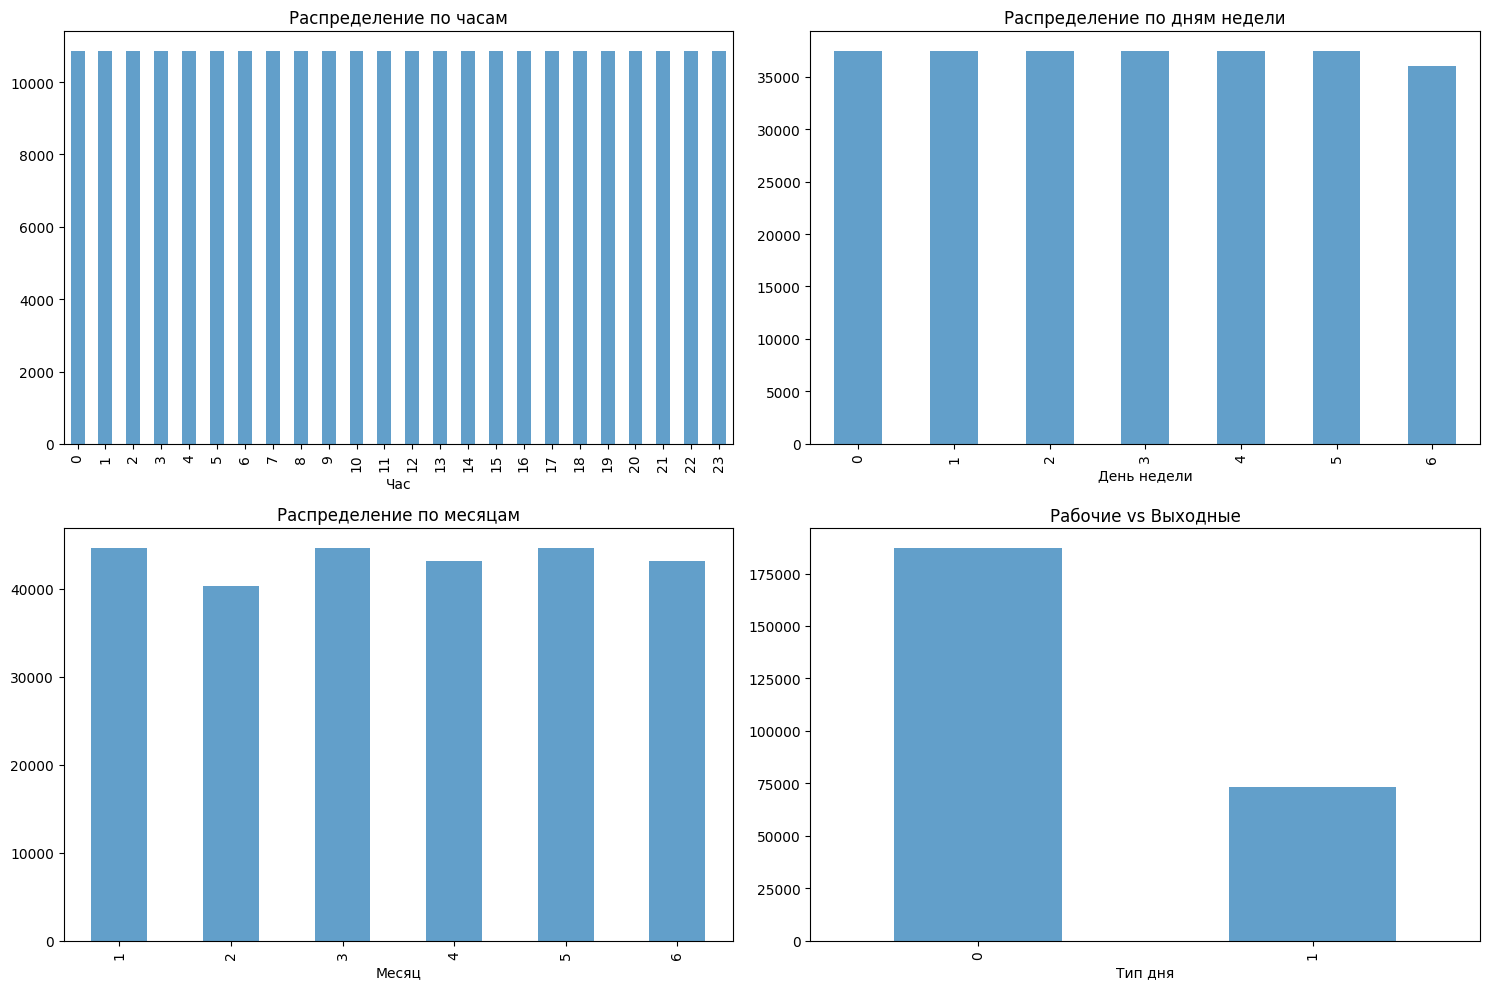

In [301]:
# –£–õ–£–ß–®–ï–ù–ù–´–ô –ê–ù–ê–õ–ò–ó –° –í–´–í–û–î–û–ú –ß–ò–°–õ–û–í–´–• –ó–ù–ê–ß–ï–ù–ò–ô (–ò–°–ü–†–ê–í–õ–ï–ù–ù–ê–Ø –í–ï–†–°–ò–Ø)
print("\n" + "="*60)
print("–î–ï–¢–ê–õ–¨–ù–´–ô –ê–ù–ê–õ–ò–ó –î–ê–ù–ù–´–• –° –ß–ò–°–õ–û–í–´–ú–ò –ó–ù–ê–ß–ï–ù–ò–Ø–ú–ò")
print("="*60)

# 1. –†–ê–°–ü–†–ï–î–ï–õ–ï–ù–ò–ï –ü–û –ß–ê–°–ê–ú (–∏—Å–ø–æ–ª—å–∑—É–µ–º —É–∂–µ —Å–æ–∑–¥–∞–Ω–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ 'hour')
print("\n=== –†–ê–°–ü–†–ï–î–ï–õ–ï–ù–ò–ï –ü–û –ß–ê–°–ê–ú ===")
hourly_counts = df['hour'].value_counts().sort_index()
print("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π –ø–æ —á–∞—Å–∞–º:")
for hour in range(24):
    count = hourly_counts.get(hour, 0)
    print(f"  –ß–∞—Å {hour:2d}: {count:6d} –∑–∞–ø–∏—Å–µ–π")

# 2. –†–ê–°–ü–†–ï–î–ï–õ–ï–ù–ò–ï –ü–û –î–ù–Ø–ú –ù–ï–î–ï–õ–ò (–∏—Å–ø–æ–ª—å–∑—É–µ–º —É–∂–µ —Å–æ–∑–¥–∞–Ω–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫)
print("\n=== –†–ê–°–ü–†–ï–î–ï–õ–ï–ù–ò–ï –ü–û –î–ù–Ø–ú –ù–ï–î–ï–õ–ò ===")
daily_counts = df['day_of_week'].value_counts().sort_index()
days_map = {0: '–ü–æ–Ω–µ–¥–µ–ª—å–Ω–∏–∫', 1: '–í—Ç–æ—Ä–Ω–∏–∫', 2: '–°—Ä–µ–¥–∞', 3: '–ß–µ—Ç–≤–µ—Ä–≥', 
            4: '–ü—è—Ç–Ω–∏—Ü–∞', 5: '–°—É–±–±–æ—Ç–∞', 6: '–í–æ—Å–∫—Ä–µ—Å–µ–Ω—å–µ'}

for day_num in sorted(daily_counts.index):
    day_name = days_map[day_num]
    count = daily_counts[day_num]
    print(f"  {day_name}: {count:6d} –∑–∞–ø–∏—Å–µ–π")

# 3. –†–ê–°–ü–†–ï–î–ï–õ–ï–ù–ò–ï –ü–û –ú–ï–°–Ø–¶–ê–ú (–∏—Å–ø–æ–ª—å–∑—É–µ–º —É–∂–µ —Å–æ–∑–¥–∞–Ω–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫)
print("\n=== –†–ê–°–ü–†–ï–î–ï–õ–ï–ù–ò–ï –ü–û –ú–ï–°–Ø–¶–ê–ú ===")
monthly_counts = df['month'].value_counts().sort_index()
months_map = {1: '–Ø–Ω–≤–∞—Ä—å', 2: '–§–µ–≤—Ä–∞–ª—å', 3: '–ú–∞—Ä—Ç', 4: '–ê–ø—Ä–µ–ª—å', 
              5: '–ú–∞–π', 6: '–ò—é–Ω—å'}

for month_num in sorted(monthly_counts.index):
    month_name = months_map[month_num]
    count = monthly_counts[month_num]
    print(f"  {month_name}: {count:6d} –∑–∞–ø–∏—Å–µ–π")

# 4. –†–ê–ë–û–ß–ò–ï VS –í–´–•–û–î–ù–´–ï (–∏—Å–ø–æ–ª—å–∑—É–µ–º —É–∂–µ —Å–æ–∑–¥–∞–Ω–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫)
print("\n=== –†–ê–ë–û–ß–ò–ï VS –í–´–•–û–î–ù–´–ï ===")
weekend_counts = df['is_weekend'].value_counts().sort_index()
for is_weekend in sorted(weekend_counts.index):
    day_type = "–í—ã—Ö–æ–¥–Ω—ã–µ" if is_weekend == 1 else "–†–∞–±–æ—á–∏–µ"
    count = weekend_counts[is_weekend]
    percentage = (count / len(df)) * 100
    print(f"  {day_type}: {count:6d} –∑–∞–ø–∏—Å–µ–π ({percentage:.1f}%)")

# 5. –ê–ù–ê–õ–ò–ó –ü–ò–ö–û–í–´–• –ü–ï–†–ò–û–î–û–í (–ù–û–í–û–ï!)
print("\n=== –ê–ù–ê–õ–ò–ó –ü–ò–ö–û–í–´–• –ü–ï–†–ò–û–î–û–í ===")
print("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π –ø–æ –ø–∏–∫–æ–≤—ã–º –ø–µ—Ä–∏–æ–¥–∞–º:")
print(f"  –£—Ç—Ä–µ–Ω–Ω–∏–π –ø–∏–∫ (7-9): {df['is_morning_peak'].sum():6d} –∑–∞–ø–∏—Å–µ–π")
print(f"  –í–µ—á–µ—Ä–Ω–∏–π –ø–∏–∫ (18-22): {df['is_evening_peak'].sum():6d} –∑–∞–ø–∏—Å–µ–π") 
print(f"  –ù–æ—á–Ω–æ–µ –≤—Ä–µ–º—è (0-5): {df['is_night'].sum():6d} –∑–∞–ø–∏—Å–µ–π")

# –ü—Ä–æ–≤–µ—Ä—è–µ–º –±–∞–ª–∞–Ω—Å –¥–∞–Ω–Ω—ã—Ö
print(f"\n=== –ë–ê–õ–ê–ù–° –î–ê–ù–ù–´–• ===")
print(f"–û–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π: {len(df):,}")
print(f"–ü–µ—Ä–∏–æ–¥ –¥–∞–Ω–Ω—ã—Ö: {df.index.min()} - {df.index.max()}")
print(f"–î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å: {(df.index.max() - df.index.min()).days} –¥–Ω–µ–π")

# –ê–Ω–∞–ª–∏–∑ –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–≤
print(f"\n=== –í–†–ï–ú–ï–ù–ù–´–ï –ò–ù–¢–ï–†–í–ê–õ–´ ===")
time_diff = df.index.to_series().diff()
print(f"–°—Ä–µ–¥–Ω–∏–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –º–µ–∂–¥—É –∏–∑–º–µ—Ä–µ–Ω–∏—è–º–∏: {time_diff.mean()}")
print(f"–ú–∏–Ω–∏–º–∞–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª: {time_diff.min()}")
print(f"–ú–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª: {time_diff.max()}")

# –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
df['hour'].value_counts().sort_index().plot(kind='bar', alpha=0.7)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ —á–∞—Å–∞–º')
plt.xlabel('–ß–∞—Å')

plt.subplot(2, 2, 2)
df['day_of_week'].value_counts().sort_index().plot(kind='bar', alpha=0.7)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –¥–Ω—è–º –Ω–µ–¥–µ–ª–∏')
plt.xlabel('–î–µ–Ω—å –Ω–µ–¥–µ–ª–∏')

plt.subplot(2, 2, 3)
df['month'].value_counts().sort_index().plot(kind='bar', alpha=0.7)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –º–µ—Å—è—Ü–∞–º')
plt.xlabel('–ú–µ—Å—è—Ü')

plt.subplot(2, 2, 4)
df['is_weekend'].value_counts().plot(kind='bar', alpha=0.7)
plt.title('–†–∞–±–æ—á–∏–µ vs –í—ã—Ö–æ–¥–Ω—ã–µ')
plt.xlabel('–¢–∏–ø –¥–Ω—è')

plt.tight_layout()
plt.show()

–î–ï–¢–ê–õ–¨–ù–´–ô –ê–ù–ê–õ–ò–ó –¶–ï–õ–ï–í–û–ô –ü–ï–†–ï–ú–ï–ù–ù–û–ô
–ê–Ω–∞–ª–∏–∑ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π (Global_active_power):
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π: 260,640
–°—Ä–µ–¥–Ω–µ–µ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ: 1.156 –∫–í—Ç
–ú–µ–¥–∏–∞–Ω–Ω–æ–µ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ: 0.564 –∫–í—Ç
–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ: 10.670 –∫–í—Ç
–ú–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ: 0.082 –∫–í—Ç

=== –†–ê–°–®–ò–†–ï–ù–ù–ê–Ø –°–¢–ê–¢–ò–°–¢–ò–ö–ê ===
–°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ: 1.175 –∫–í—Ç
–î–∏—Å–ø–µ—Ä—Å–∏—è: 1.382
–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –≤–∞—Ä–∏–∞—Ü–∏–∏: 101.7%

=== –ö–í–ê–ù–¢–ò–õ–ò –†–ê–°–ü–†–ï–î–ï–õ–ï–ù–ò–Ø ===
  1% –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—å: 0.118 –∫–í—Ç
  5% –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—å: 0.198 –∫–í—Ç
  25% –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—å: 0.298 –∫–í—Ç
  50% –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—å: 0.564 –∫–í—Ç
  75% –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—å: 1.590 –∫–í—Ç
  95% –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—å: 3.612 –∫–í—Ç
  99% –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—å: 5.307 –∫–í—Ç

=== –ê–ù–ê–õ–ò–ó –ú–û–î–ê–õ–¨–ù–´–• –ó–ù–ê–ß–ï–ù–ò–ô ===
–°–

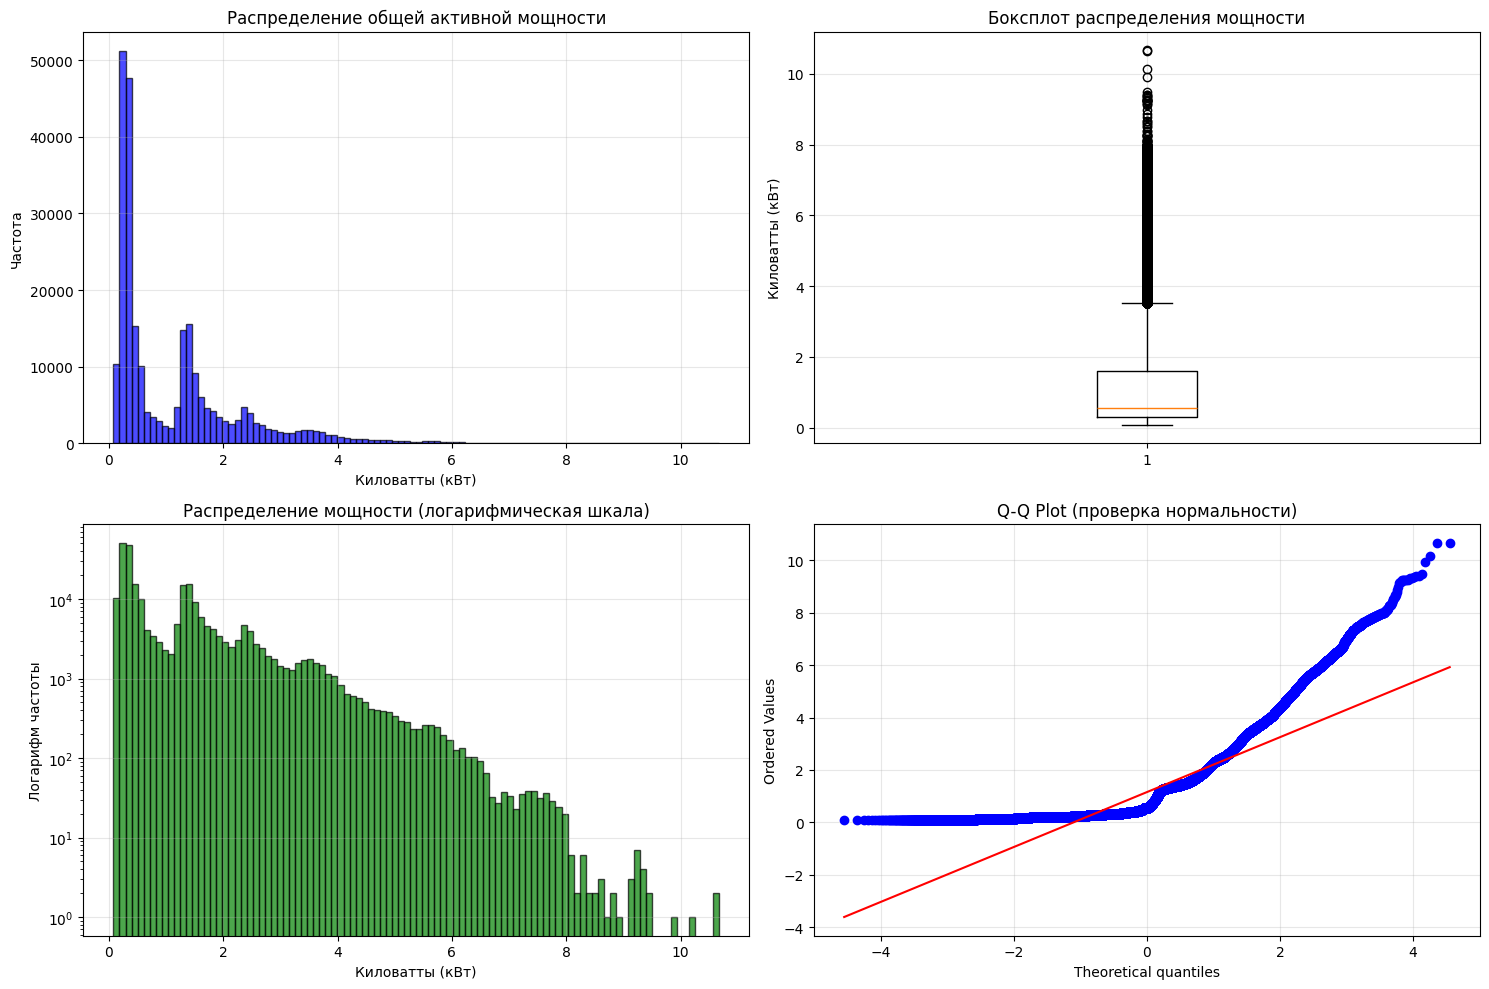

In [302]:
# –î–ï–¢–ê–õ–¨–ù–´–ô –ê–ù–ê–õ–ò–ó –¶–ï–õ–ï–í–û–ô –ü–ï–†–ï–ú–ï–ù–ù–û–ô
print("="*60)
print("–î–ï–¢–ê–õ–¨–ù–´–ô –ê–ù–ê–õ–ò–ó –¶–ï–õ–ï–í–û–ô –ü–ï–†–ï–ú–ï–ù–ù–û–ô")
print("="*60)

# –ë–∞–∑–æ–≤–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞
print(f"–ê–Ω–∞–ª–∏–∑ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π (Global_active_power):")
print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π: {len(df):,}")
print(f"–°—Ä–µ–¥–Ω–µ–µ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ: {df['Global_active_power'].mean():.3f} –∫–í—Ç")
print(f"–ú–µ–¥–∏–∞–Ω–Ω–æ–µ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ: {df['Global_active_power'].median():.3f} –∫–í—Ç")
print(f"–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ: {df['Global_active_power'].max():.3f} –∫–í—Ç") 
print(f"–ú–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ: {df['Global_active_power'].min():.3f} –∫–í—Ç")

# –†–∞—Å—à–∏—Ä–µ–Ω–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞
print(f"\n=== –†–ê–°–®–ò–†–ï–ù–ù–ê–Ø –°–¢–ê–¢–ò–°–¢–ò–ö–ê ===")
print(f"–°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ: {df['Global_active_power'].std():.3f} –∫–í—Ç")
print(f"–î–∏—Å–ø–µ—Ä—Å–∏—è: {df['Global_active_power'].var():.3f}")
print(f"–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –≤–∞—Ä–∏–∞—Ü–∏–∏: {(df['Global_active_power'].std() / df['Global_active_power'].mean() * 100):.1f}%")

# –ö–≤–∞–Ω—Ç–∏–ª–∏
print(f"\n=== –ö–í–ê–ù–¢–ò–õ–ò –†–ê–°–ü–†–ï–î–ï–õ–ï–ù–ò–Ø ===")
quantiles = [0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]
for q in quantiles:
    value = df['Global_active_power'].quantile(q)
    print(f"  {int(q*100)}% –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—å: {value:.3f} –∫–í—Ç")

# –ê–Ω–∞–ª–∏–∑ –º–æ–¥ (–Ω–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π)
print(f"\n=== –ê–ù–ê–õ–ò–ó –ú–û–î–ê–õ–¨–ù–´–• –ó–ù–ê–ß–ï–ù–ò–ô ===")
top_values = df['Global_active_power'].value_counts().head(5)
print("–°–∞–º—ã–µ —á–∞—Å—Ç—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è:")
for value, count in top_values.items():
    percentage = (count / len(df)) * 100
    print(f"  {value:.3f} –∫–í—Ç: {count:,} –∑–∞–ø–∏—Å–µ–π ({percentage:.2f}%)")

# –ê–Ω–∞–ª–∏–∑ –Ω—É–ª–µ–≤–æ–≥–æ –∏ –Ω–∏–∑–∫–æ–≥–æ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è
low_consumption = df[df['Global_active_power'] < 0.1]
print(f"\n=== –ê–ù–ê–õ–ò–ó –ù–ò–ó–ö–û–ì–û –ü–û–¢–†–ï–ë–õ–ï–ù–ò–Ø ===")
print(f"–ó–∞–ø–∏—Å–µ–π —Å –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ–º < 0.1 –∫–í—Ç: {len(low_consumption):,} ({len(low_consumption)/len(df)*100:.2f}%)")

# –ê–Ω–∞–ª–∏–∑ –≤—ã—Å–æ–∫–æ–≥–æ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è
high_consumption = df[df['Global_active_power'] > 5.0]
print(f"–ó–∞–ø–∏—Å–µ–π —Å –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ–º > 5.0 –∫–í—Ç: {len(high_consumption):,} ({len(high_consumption)/len(df)*100:.2f}%)")

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è
plt.figure(figsize=(15, 10))

# –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è
plt.subplot(2, 2, 1)
plt.hist(df['Global_active_power'], bins=100, alpha=0.7, color='blue', edgecolor='black')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ–±—â–µ–π –∞–∫—Ç–∏–≤–Ω–æ–π –º–æ—â–Ω–æ—Å—Ç–∏')
plt.xlabel('–ö–∏–ª–æ–≤–∞—Ç—Ç—ã (–∫–í—Ç)')
plt.ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
plt.grid(True, alpha=0.3)

# –ë–æ–∫—Å–ø–ª–æ—Ç
plt.subplot(2, 2, 2)
plt.boxplot(df['Global_active_power'], vert=True)
plt.title('–ë–æ–∫—Å–ø–ª–æ—Ç —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –º–æ—â–Ω–æ—Å—Ç–∏')
plt.ylabel('–ö–∏–ª–æ–≤–∞—Ç—Ç—ã (–∫–í—Ç)')
plt.grid(True, alpha=0.3)

# –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤ –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–æ–π —à–∫–∞–ª–µ (–¥–ª—è –ª—É—á—à–µ–π –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏)
plt.subplot(2, 2, 3)
plt.hist(df['Global_active_power'], bins=100, alpha=0.7, color='green', edgecolor='black', log=True)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –º–æ—â–Ω–æ—Å—Ç–∏ (–ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–∞—è —à–∫–∞–ª–∞)')
plt.xlabel('–ö–∏–ª–æ–≤–∞—Ç—Ç—ã (–∫–í—Ç)')
plt.ylabel('–õ–æ–≥–∞—Ä–∏—Ñ–º —á–∞—Å—Ç–æ—Ç—ã')
plt.grid(True, alpha=0.3)

# QQ-plot –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏
plt.subplot(2, 2, 4)
from scipy import stats
stats.probplot(df['Global_active_power'], dist="norm", plot=plt)
plt.title('Q-Q Plot (–ø—Ä–æ–≤–µ—Ä–∫–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

–î–ï–¢–ê–õ–¨–ù–´–ô –ê–ù–ê–õ–ò–ó –°–£–¢–û–ß–ù–û–ô –°–ï–ó–û–ù–ù–û–°–¢–ò
–°—Ä–µ–¥–Ω–µ–µ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ –ø–æ —á–∞—Å–∞–º —Å—É—Ç–æ–∫:
–ß–∞—Å  –ü–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ (–∫–í—Ç)  –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ
  0:00   0.778 –∫–í—Ç          ¬±0.935 –∫–í—Ç
  1:00   0.634 –∫–í—Ç          ¬±0.769 –∫–í—Ç
  2:00   0.540 –∫–í—Ç          ¬±0.681 –∫–í—Ç
  3:00   0.517 –∫–í—Ç          ¬±0.616 –∫–í—Ç
  4:00   0.489 –∫–í—Ç          ¬±0.588 –∫–í—Ç
  5:00   0.527 –∫–í—Ç          ¬±0.634 –∫–í—Ç
  6:00   0.940 –∫–í—Ç          ¬±1.092 –∫–í—Ç
  7:00   1.518 –∫–í—Ç          ¬±1.137 –∫–í—Ç
  8:00   1.492 –∫–í—Ç          ¬±1.057 –∫–í—Ç
  9:00   1.340 –∫–í—Ç          ¬±0.948 –∫–í—Ç
 10:00   1.200 –∫–í—Ç          ¬±0.994 –∫–í—Ç
 11:00   1.102 –∫–í—Ç          ¬±1.000 –∫–í—Ç
 12:00   1.054 –∫–í—Ç          ¬±1.098 –∫–í—Ç
 13:00   1.000 –∫–í—Ç          ¬±1.056 –∫–í—Ç
 14:00   1.040 –∫–í—Ç          ¬±1.045 –∫–í—Ç
 15:00   0.996 –∫–í—Ç          ¬±1.060 –∫–í—Ç
 16:00   0.949 –∫–í—Ç          ¬±0.967 –∫–í

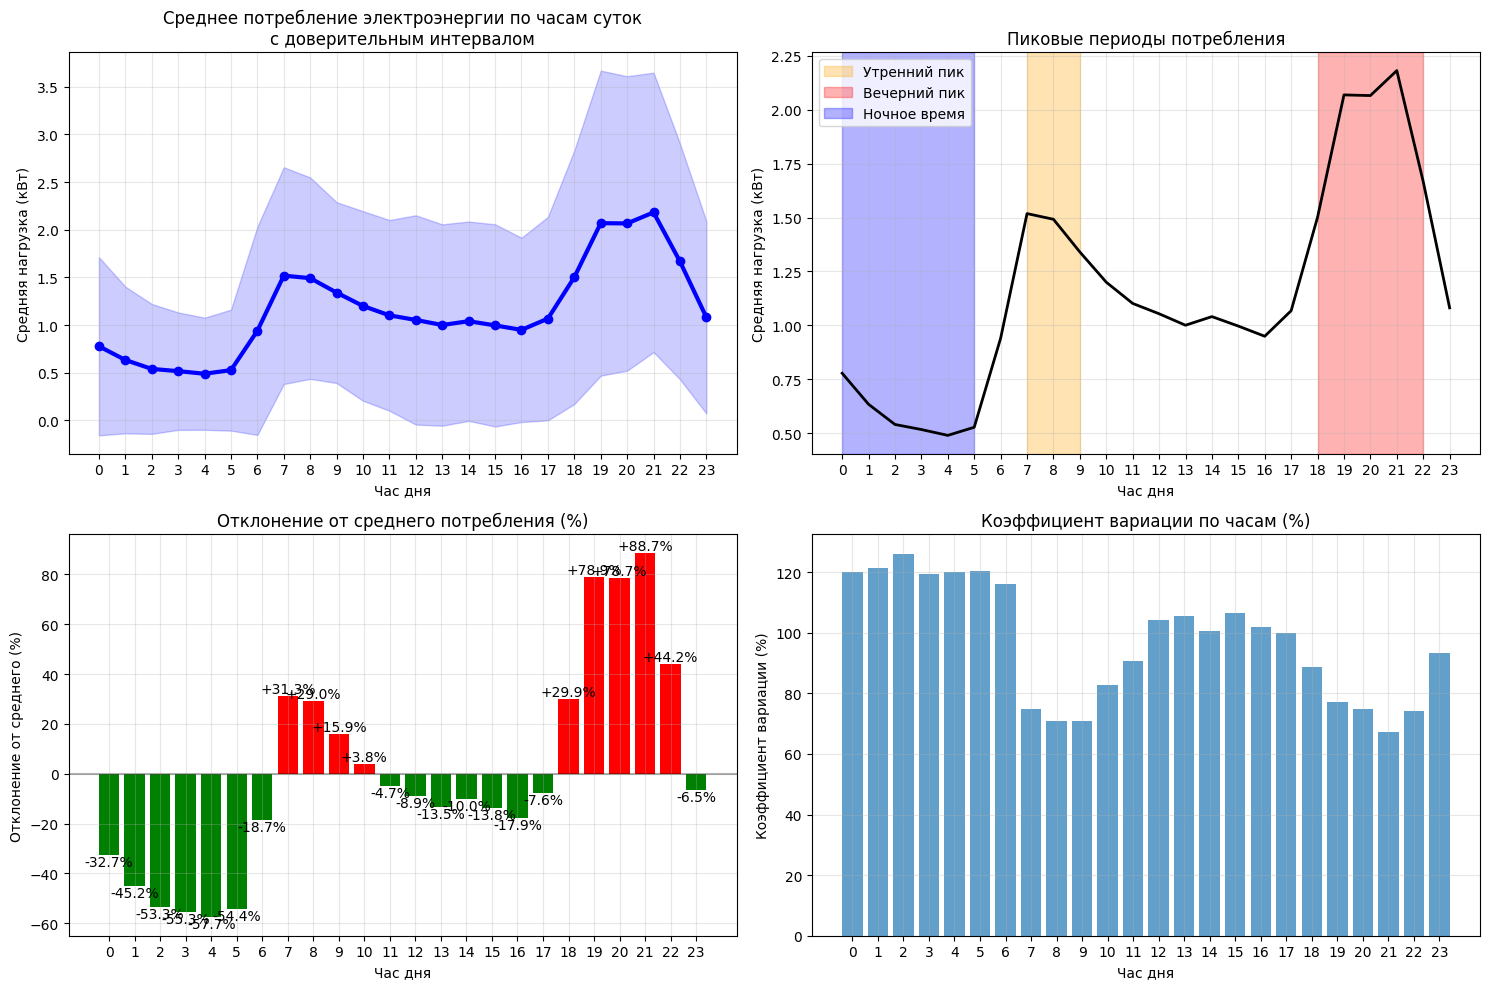

In [303]:
# –î–ï–¢–ê–õ–¨–ù–´–ô –ê–ù–ê–õ–ò–ó –°–£–¢–û–ß–ù–û–ô –°–ï–ó–û–ù–ù–û–°–¢–ò
print("="*60)
print("–î–ï–¢–ê–õ–¨–ù–´–ô –ê–ù–ê–õ–ò–ó –°–£–¢–û–ß–ù–û–ô –°–ï–ó–û–ù–ù–û–°–¢–ò")
print("="*60)

# –ì—Ä—É–ø–ø–∏—Ä—É–µ–º –ø–æ —á–∞—Å–∞–º –∏ —Å—á–∏—Ç–∞–µ–º —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É
hourly_stats = df.groupby('hour')['Global_active_power'].agg(['mean', 'std', 'min', 'max', 'count'])
hourly_pattern = hourly_stats['mean']

print("–°—Ä–µ–¥–Ω–µ–µ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ –ø–æ —á–∞—Å–∞–º —Å—É—Ç–æ–∫:")
print("–ß–∞—Å  –ü–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ (–∫–í—Ç)  –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ")
for hour in range(24):
    mean_val = hourly_pattern[hour]
    std_val = hourly_stats['std'][hour]
    print(f" {hour:2d}:00   {mean_val:.3f} –∫–í—Ç          ¬±{std_val:.3f} –∫–í—Ç")

# –ê–Ω–∞–ª–∏–∑ —ç–∫—Å—Ç—Ä–µ–º—É–º–æ–≤
min_hour = hourly_pattern.idxmin()
max_hour = hourly_pattern.idxmax()
min_consumption = hourly_pattern.min()
max_consumption = hourly_pattern.max()

print(f"\n=== –ö–õ–Æ–ß–ï–í–´–ï –¢–û–ß–ö–ò –°–£–¢–û–ß–ù–û–ì–û –¶–ò–ö–õ–ê ===")
print(f"üìâ –ú–ò–ù–ò–ú–£–ú: {min_consumption:.3f} –∫–í—Ç –≤ {min_hour}:00")
print(f"üìà –ú–ê–ö–°–ò–ú–£–ú: {max_consumption:.3f} –∫–í—Ç –≤ {max_hour}:00")
print(f"üìä –†–ê–ó–ú–ê–•: {max_consumption - min_consumption:.3f} –∫–í—Ç")

# –ê–Ω–∞–ª–∏–∑ –ø–∏–∫–æ–≤—ã—Ö –ø–µ—Ä–∏–æ–¥–æ–≤
print(f"\n=== –ê–ù–ê–õ–ò–ó –ü–ò–ö–û–í–´–• –ü–ï–†–ò–û–î–û–í ===")
morning_peak = hourly_pattern.loc[7:9].mean()
evening_peak = hourly_pattern.loc[18:22].mean()
night_val = hourly_pattern.loc[0:5].mean()

print(f"üåÖ –£—Ç—Ä–µ–Ω–Ω–∏–π –ø–∏–∫ (7-9): {morning_peak:.3f} –∫–í—Ç")
print(f"üåá –í–µ—á–µ—Ä–Ω–∏–π –ø–∏–∫ (18-22): {evening_peak:.3f} –∫–í—Ç") 
print(f"üåô –ù–æ—á–Ω–æ–µ –≤—Ä–µ–º—è (0-5): {night_val:.3f} –∫–í—Ç")
print(f"üìà –°–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ –≤–µ—á–µ—Ä/—É—Ç—Ä–æ: {evening_peak/morning_peak:.2f} —Ä–∞–∑–∞")

# –ê–Ω–∞–ª–∏–∑ —Ä–æ—Å—Ç–∞/—Å–ø–∞–¥–∞
print(f"\n=== –î–ò–ù–ê–ú–ò–ö–ê –ò–ó–ú–ï–ù–ï–ù–ò–ô ===")
morning_growth = hourly_pattern[7] - hourly_pattern[6]  # —Ä–æ—Å—Ç —Å 6 –¥–æ 7
evening_growth = hourly_pattern[18] - hourly_pattern[17]  # —Ä–æ—Å—Ç —Å 17 –¥–æ 18
night_decline = hourly_pattern[23] - hourly_pattern[22]  # —Å–ø–∞–¥ —Å 22 –¥–æ 23

print(f"üìà –°–∞–º—ã–π —Ä–µ–∑–∫–∏–π —Ä–æ—Å—Ç: +{morning_growth:.3f} –∫–í—Ç (6:00 ‚Üí 7:00)")
print(f"üìà –í–µ—á–µ—Ä–Ω–∏–π —Ä–æ—Å—Ç: +{evening_growth:.3f} –∫–í—Ç (17:00 ‚Üí 18:00)")
print(f"üìâ –í–µ—á–µ—Ä–Ω–∏–π —Å–ø–∞–¥: {night_decline:.3f} –∫–í—Ç (22:00 ‚Üí 23:00)")

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plt.figure(figsize=(15, 10))

# –û—Å–Ω–æ–≤–Ω–æ–π –≥—Ä–∞—Ñ–∏–∫ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è
plt.subplot(2, 2, 1)
plt.plot(hourly_pattern.index, hourly_pattern.values, marker='o', linewidth=3, markersize=6, color='blue')
plt.fill_between(hourly_pattern.index, 
                 hourly_pattern - hourly_stats['std'],
                 hourly_pattern + hourly_stats['std'],
                 alpha=0.2, color='blue')
plt.title('–°—Ä–µ–¥–Ω–µ–µ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ —ç–ª–µ–∫—Ç—Ä–æ—ç–Ω–µ—Ä–≥–∏–∏ –ø–æ —á–∞—Å–∞–º —Å—É—Ç–æ–∫\n—Å –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–º –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–º')
plt.xlabel('–ß–∞—Å –¥–Ω—è')
plt.ylabel('–°—Ä–µ–¥–Ω—è—è –Ω–∞–≥—Ä—É–∑–∫–∞ (–∫–í—Ç)')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))

# –í—ã–¥–µ–ª–µ–Ω–∏–µ –ø–∏–∫–æ–≤—ã—Ö –ø–µ—Ä–∏–æ–¥–æ–≤
plt.subplot(2, 2, 2)
plt.plot(hourly_pattern.index, hourly_pattern.values, linewidth=2, color='black')

# –ó–æ–Ω—ã –ø–∏–∫–æ–≤
plt.axvspan(7, 9, alpha=0.3, color='orange', label='–£—Ç—Ä–µ–Ω–Ω–∏–π –ø–∏–∫')
plt.axvspan(18, 22, alpha=0.3, color='red', label='–í–µ—á–µ—Ä–Ω–∏–π –ø–∏–∫') 
plt.axvspan(0, 5, alpha=0.3, color='blue', label='–ù–æ—á–Ω–æ–µ –≤—Ä–µ–º—è')

plt.title('–ü–∏–∫–æ–≤—ã–µ –ø–µ—Ä–∏–æ–¥—ã –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è')
plt.xlabel('–ß–∞—Å –¥–Ω—è')
plt.ylabel('–°—Ä–µ–¥–Ω—è—è –Ω–∞–≥—Ä—É–∑–∫–∞ (–∫–í—Ç)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))

# –°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Å –æ–±—â–∏–º —Å—Ä–µ–¥–Ω–∏–º
plt.subplot(2, 2, 3)
overall_mean = df['Global_active_power'].mean()
relative_consumption = (hourly_pattern / overall_mean - 1) * 100

bars = plt.bar(relative_consumption.index, relative_consumption.values, 
               color=['red' if x > 0 else 'green' for x in relative_consumption])
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.title('–û—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –æ—Ç —Å—Ä–µ–¥–Ω–µ–≥–æ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è (%)')
plt.xlabel('–ß–∞—Å –¥–Ω—è')
plt.ylabel('–û—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –æ—Ç —Å—Ä–µ–¥–Ω–µ–≥–æ (%)')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))

# –î–æ–±–∞–≤–ª—è–µ–º –ø–æ–¥–ø–∏—Å–∏ –Ω–∞ —Å—Ç–æ–ª–±—Ü—ã
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:+.1f}%', ha='center', va='bottom' if height > 0 else 'top')

# –ê–Ω–∞–ª–∏–∑ —Å—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç–∏ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è
plt.subplot(2, 2, 4)
coefficient_of_variation = (hourly_stats['std'] / hourly_pattern) * 100
plt.bar(coefficient_of_variation.index, coefficient_of_variation.values, alpha=0.7)
plt.title('–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –≤–∞—Ä–∏–∞—Ü–∏–∏ –ø–æ —á–∞—Å–∞–º (%)')
plt.xlabel('–ß–∞—Å –¥–Ω—è')
plt.ylabel('–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –≤–∞—Ä–∏–∞—Ü–∏–∏ (%)')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))

plt.tight_layout()
plt.show()

–î–ï–¢–ê–õ–¨–ù–´–ô –ê–ù–ê–õ–ò–ó –ù–ï–î–ï–õ–¨–ù–û–ô –°–ï–ó–û–ù–ù–û–°–¢–ò
–î–µ—Ç–∞–ª—å–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è –ø–æ –¥–Ω—è–º –Ω–µ–¥–µ–ª–∏:
–î–µ–Ω—å         –°—Ä–µ–¥–Ω–µ–µ   –ú–µ–¥–∏–∞–Ω–∞   –°—Ç–∞–Ω–¥.–æ—Ç–∫–ª   –ú–∏–Ω     –ú–∞–∫—Å   –ó–∞–ø–∏—Å–µ–π
–ü–æ–Ω–µ–¥–µ–ª—å–Ω–∏–∫  1.094 –∫–í—Ç  0.574 –∫–í—Ç  ¬±1.063 –∫–í—Ç  0.08 –∫–í—Ç  9.49 –∫–í—Ç  37,440.0
–í—Ç–æ—Ä–Ω–∏–∫      0.956 –∫–í—Ç  0.436 –∫–í—Ç  ¬±1.025 –∫–í—Ç  0.08 –∫–í—Ç  8.67 –∫–í—Ç  37,440.0
–°—Ä–µ–¥–∞        1.209 –∫–í—Ç  0.842 –∫–í—Ç  ¬±1.155 –∫–í—Ç  0.08 –∫–í—Ç  8.97 –∫–í—Ç  37,440.0
–ß–µ—Ç–≤–µ—Ä–≥      1.044 –∫–í—Ç  0.414 –∫–í—Ç  ¬±1.109 –∫–í—Ç  0.10 –∫–í—Ç  9.41 –∫–í—Ç  37,440.0
–ü—è—Ç–Ω–∏—Ü–∞      0.938 –∫–í—Ç  0.392 –∫–í—Ç  ¬±0.984 –∫–í—Ç  0.08 –∫–í—Ç  7.61 –∫–í—Ç  37,440.0
–°—É–±–±–æ—Ç–∞      1.290 –∫–í—Ç  0.708 –∫–í—Ç  ¬±1.288 –∫–í—Ç  0.10 –∫–í—Ç  9.27 –∫–í—Ç  37,440.0
–í–æ—Å–∫—Ä–µ—Å–µ–Ω—å–µ  1.580 –∫–í—Ç  1.322 –∫–í—Ç  ¬±1.425 –∫–í—Ç  0.10 –∫–í—Ç  10.67 –∫–í—Ç  36,000.0

=== –ö–õ–Æ–ß–ï–í–´–ï –¢–û–

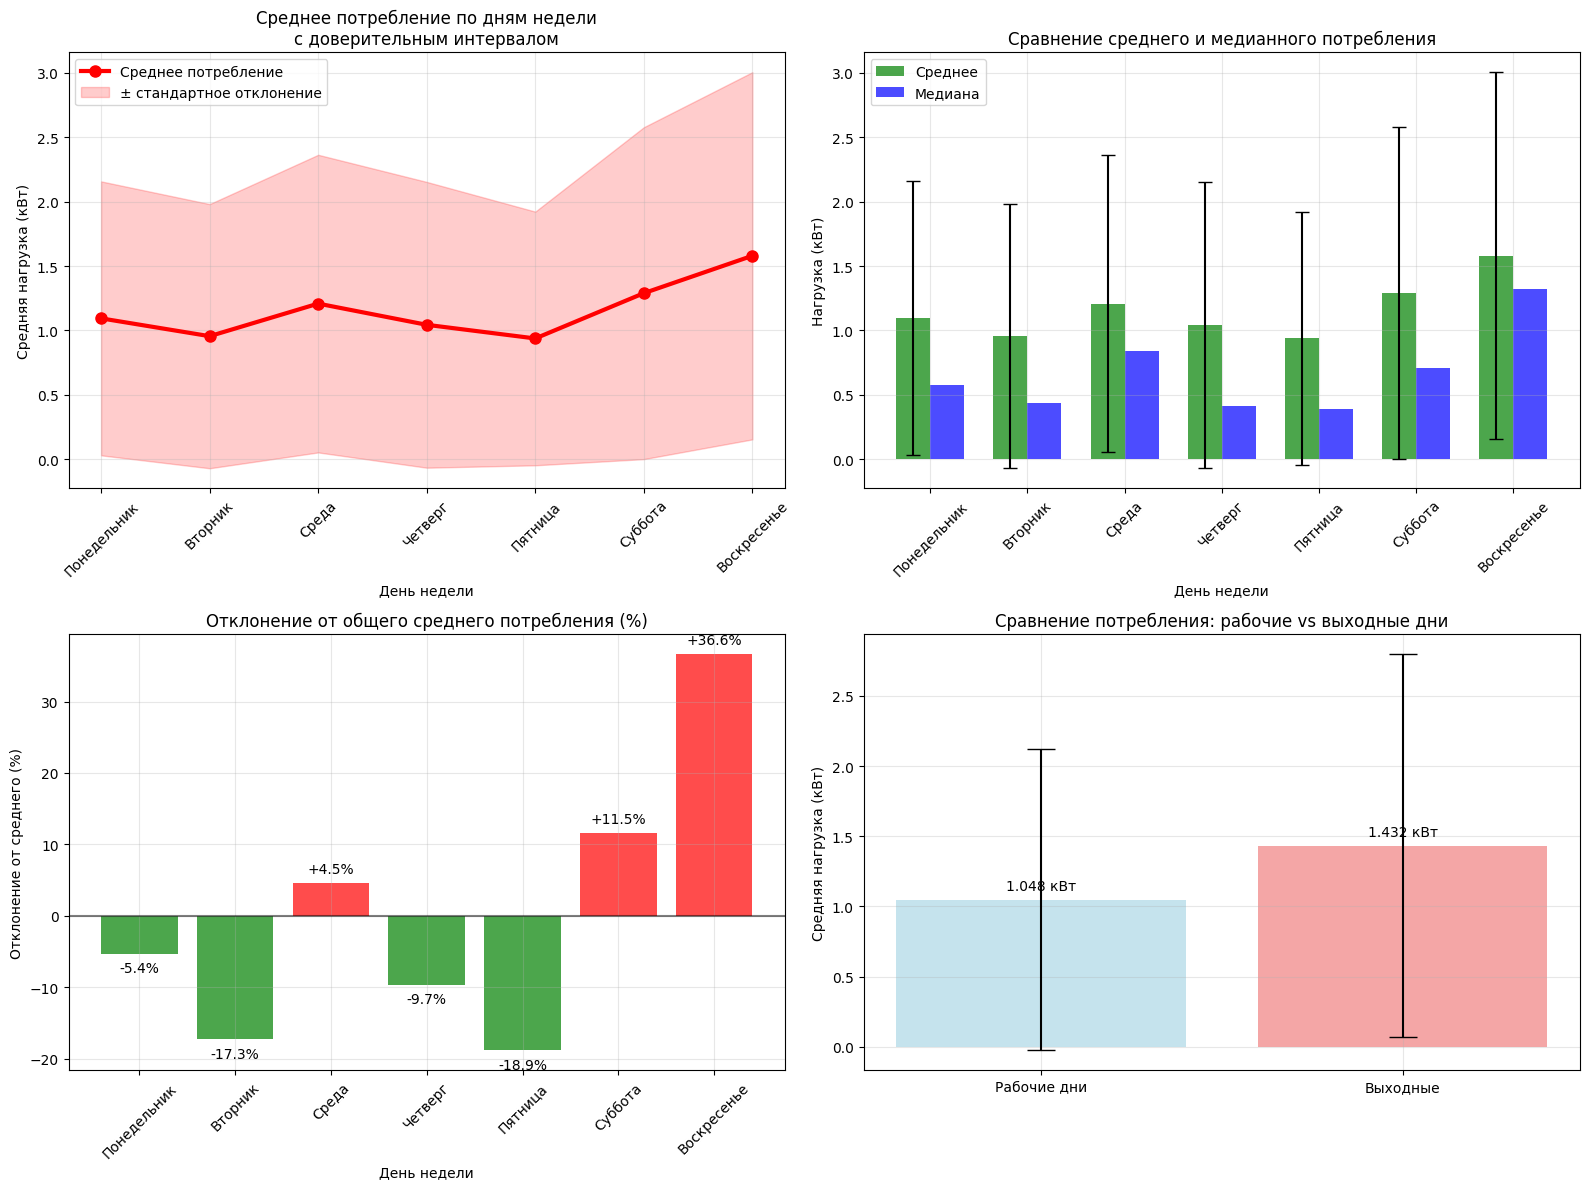

In [304]:
# –î–ï–¢–ê–õ–¨–ù–´–ô –ê–ù–ê–õ–ò–ó –ù–ï–î–ï–õ–¨–ù–û–ô –°–ï–ó–û–ù–ù–û–°–¢–ò
print("="*60)
print("–î–ï–¢–ê–õ–¨–ù–´–ô –ê–ù–ê–õ–ò–ó –ù–ï–î–ï–õ–¨–ù–û–ô –°–ï–ó–û–ù–ù–û–°–¢–ò")
print("="*60)

# –°–æ–∑–¥–∞–µ–º —Å–ª–æ–≤–∞—Ä—å –¥–ª—è –ø—Ä–∞–≤–∏–ª—å–Ω—ã—Ö –Ω–∞–∑–≤–∞–Ω–∏–π –¥–Ω–µ–π –Ω–µ–¥–µ–ª–∏
days_map = {0: '–ü–æ–Ω–µ–¥–µ–ª—å–Ω–∏–∫', 1: '–í—Ç–æ—Ä–Ω–∏–∫', 2: '–°—Ä–µ–¥–∞', 3: '–ß–µ—Ç–≤–µ—Ä–≥', 
            4: '–ü—è—Ç–Ω–∏—Ü–∞', 5: '–°—É–±–±–æ—Ç–∞', 6: '–í–æ—Å–∫—Ä–µ—Å–µ–Ω—å–µ'}

# –ì—Ä—É–ø–ø–∏—Ä—É–µ–º –ø–æ –¥–Ω—è–º –Ω–µ–¥–µ–ª–∏ –∏ —Å—á–∏—Ç–∞–µ–º —Ä–∞—Å—à–∏—Ä–µ–Ω–Ω—É—é —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É
weekly_stats = df.groupby('day_of_week')['Global_active_power'].agg([
    'mean', 'std', 'min', 'max', 'median', 'count'
])

print("–î–µ—Ç–∞–ª—å–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è –ø–æ –¥–Ω—è–º –Ω–µ–¥–µ–ª–∏:")
print("–î–µ–Ω—å         –°—Ä–µ–¥–Ω–µ–µ   –ú–µ–¥–∏–∞–Ω–∞   –°—Ç–∞–Ω–¥.–æ—Ç–∫–ª   –ú–∏–Ω     –ú–∞–∫—Å   –ó–∞–ø–∏—Å–µ–π")
for day in weekly_stats.index:
    day_name = days_map[day]
    stats = weekly_stats.loc[day]
    print(f"{day_name:<12} {stats['mean']:.3f} –∫–í—Ç  {stats['median']:.3f} –∫–í—Ç  "
          f"¬±{stats['std']:.3f} –∫–í—Ç  {stats['min']:.2f} –∫–í—Ç  {stats['max']:.2f} –∫–í—Ç  "
          f"{stats['count']:,}")

# –ê–Ω–∞–ª–∏–∑ —ç–∫—Å—Ç—Ä–µ–º—É–º–æ–≤
min_day = weekly_stats['mean'].idxmin()
max_day = weekly_stats['mean'].idxmax()
min_consumption = weekly_stats['mean'].min()
max_consumption = weekly_stats['mean'].max()

print(f"\n=== –ö–õ–Æ–ß–ï–í–´–ï –¢–û–ß–ö–ò –ù–ï–î–ï–õ–¨–ù–û–ì–û –¶–ò–ö–õ–ê ===")
print(f"üìâ –ú–ò–ù–ò–ú–£–ú: {min_consumption:.3f} –∫–í—Ç –≤ {days_map[min_day]}")
print(f"üìà –ú–ê–ö–°–ò–ú–£–ú: {max_consumption:.3f} –∫–í—Ç –≤ {days_map[max_day]}")
print(f"üìä –†–ê–ó–ú–ê–•: {max_consumption - min_consumption:.3f} –∫–í—Ç")

# –ê–Ω–∞–ª–∏–∑ —Å—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç–∏ –ø–æ –¥–Ω—è–º
print(f"\n=== –ê–ù–ê–õ–ò–ó –°–¢–ê–ë–ò–õ–¨–ù–û–°–¢–ò –ü–û–¢–†–ï–ë–õ–ï–ù–ò–Ø ===")
cv_by_day = (weekly_stats['std'] / weekly_stats['mean']) * 100
most_stable_day = cv_by_day.idxmin()
most_variable_day = cv_by_day.idxmax()

print(f"üìä –ù–∞–∏–±–æ–ª–µ–µ —Å—Ç–∞–±–∏–ª—å–Ω—ã–π –¥–µ–Ω—å: {days_map[most_stable_day]} (CV: {cv_by_day[most_stable_day]:.1f}%)")
print(f"üìä –ù–∞–∏–±–æ–ª–µ–µ –∏–∑–º–µ–Ω—á–∏–≤—ã–π –¥–µ–Ω—å: {days_map[most_variable_day]} (CV: {cv_by_day[most_variable_day]:.1f}%)")

# –ê–Ω–∞–ª–∏–∑ —Ä–∞–±–æ—á–∏—Ö vs –≤—ã—Ö–æ–¥–Ω—ã—Ö —Å –¥–µ—Ç–∞–ª–∏–∑–∞—Ü–∏–µ–π
workdays_data = df[df['is_weekend'] == 0]['Global_active_power']
weekends_data = df[df['is_weekend'] == 1]['Global_active_power']

workdays_mean = workdays_data.mean()
weekends_mean = weekends_data.mean()
difference = ((weekends_mean - workdays_mean) / workdays_mean) * 100

print(f"\n=== –î–ï–¢–ê–õ–¨–ù–û–ï –°–†–ê–í–ù–ï–ù–ò–ï –†–ê–ë–û–ß–ò–• –ò –í–´–•–û–î–ù–´–• ===")
print(f"üìÖ –†–∞–±–æ—á–∏–µ –¥–Ω–∏ (–ü–Ω-–ü—Ç): {workdays_mean:.3f} –∫–í—Ç")
print(f"üéâ –í—ã—Ö–æ–¥–Ω—ã–µ –¥–Ω–∏ (–°–±-–í—Å): {weekends_mean:.3f} –∫–í—Ç")
print(f"üìà –†–∞–∑–Ω–∏—Ü–∞: {difference:+.1f}%")

print(f"\nüìä –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ —Ä–∞–±–æ—á–∏—Ö –¥–Ω–µ–π:")
print(f"  ‚Ä¢ –ú–µ–¥–∏–∞–Ω–∞: {workdays_data.median():.3f} –∫–í—Ç")
print(f"  ‚Ä¢ –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ: {workdays_data.std():.3f} –∫–í—Ç")
print(f"  ‚Ä¢ –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –≤–∞—Ä–∏–∞—Ü–∏–∏: {(workdays_data.std() / workdays_data.mean() * 100):.1f}%")

print(f"üìä –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –≤—ã—Ö–æ–¥–Ω—ã—Ö –¥–Ω–µ–π:")
print(f"  ‚Ä¢ –ú–µ–¥–∏–∞–Ω–∞: {weekends_data.median():.3f} –∫–í—Ç")
print(f"  ‚Ä¢ –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ: {weekends_data.std():.3f} –∫–í—Ç")
print(f"  ‚Ä¢ –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –≤–∞—Ä–∏–∞—Ü–∏–∏: {(weekends_data.std() / weekends_data.mean() * 100):.1f}%")

# –ê–Ω–∞–ª–∏–∑ –ø–æ —Ç–∏–ø–∞–º –¥–Ω–µ–π (–Ω–∞—á–∞–ª–æ/–∫–æ–Ω–µ—Ü –Ω–µ–¥–µ–ª–∏)
print(f"\n=== –ê–ù–ê–õ–ò–ó –ü–û –¢–ò–ü–ê–ú –î–ù–ï–ô ===")
week_start = weekly_stats.loc[0:2, 'mean'].mean()  # –ü–Ω-–°—Ä
week_end = weekly_stats.loc[3:4, 'mean'].mean()    # –ß—Ç-–ü—Ç
weekend = weekly_stats.loc[5:6, 'mean'].mean()     # –°–±-–í—Å

print(f"üìÖ –ù–∞—á–∞–ª–æ –Ω–µ–¥–µ–ª–∏ (–ü–Ω-–°—Ä): {week_start:.3f} –∫–í—Ç")
print(f"üìÖ –ö–æ–Ω–µ—Ü –Ω–µ–¥–µ–ª–∏ (–ß—Ç-–ü—Ç): {week_end:.3f} –∫–í—Ç")
print(f"üéâ –í—ã—Ö–æ–¥–Ω—ã–µ (–°–±-–í—Å): {weekend:.3f} –∫–í—Ç")
print(f"üìà –¢—Ä–µ–Ω–¥: {((week_end - week_start) / week_start * 100):+.1f}% –∫ –∫–æ–Ω—Ü—É –Ω–µ–¥–µ–ª–∏")

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plt.figure(figsize=(16, 12))

# –ì—Ä–∞—Ñ–∏–∫ 1: –û—Å–Ω–æ–≤–Ω–æ–π —Ç—Ä–µ–Ω–¥ –ø–æ –¥–Ω—è–º
plt.subplot(2, 2, 1)
days_list = [days_map[i] for i in weekly_stats.index]
plt.plot(days_list, weekly_stats['mean'], marker='o', linewidth=3, markersize=8, 
         color='red', label='–°—Ä–µ–¥–Ω–µ–µ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ')
plt.fill_between(days_list, 
                 weekly_stats['mean'] - weekly_stats['std'],
                 weekly_stats['mean'] + weekly_stats['std'],
                 alpha=0.2, color='red', label='¬± —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ')
plt.title('–°—Ä–µ–¥–Ω–µ–µ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ –ø–æ –¥–Ω—è–º –Ω–µ–¥–µ–ª–∏\n—Å –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–º –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–º')
plt.xlabel('–î–µ–Ω—å –Ω–µ–¥–µ–ª–∏')
plt.ylabel('–°—Ä–µ–¥–Ω—è—è –Ω–∞–≥—Ä—É–∑–∫–∞ (–∫–í—Ç)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()

# –ì—Ä–∞—Ñ–∏–∫ 2: –°—Ç–æ–ª–±—á–∞—Ç–∞—è –¥–∏–∞–≥—Ä–∞–º–º–∞ —Å –º–µ–¥–∏–∞–Ω–æ–π
plt.subplot(2, 2, 2)
x_pos = np.arange(len(days_list))
width = 0.35

plt.bar(x_pos - width/2, weekly_stats['mean'], width, label='–°—Ä–µ–¥–Ω–µ–µ', 
        alpha=0.7, color='green', yerr=weekly_stats['std'], capsize=5)
plt.bar(x_pos + width/2, weekly_stats['median'], width, label='–ú–µ–¥–∏–∞–Ω–∞', 
        alpha=0.7, color='blue')

plt.title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Å—Ä–µ–¥–Ω–µ–≥–æ –∏ –º–µ–¥–∏–∞–Ω–Ω–æ–≥–æ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è')
plt.xlabel('–î–µ–Ω—å –Ω–µ–¥–µ–ª–∏')
plt.ylabel('–ù–∞–≥—Ä—É–∑–∫–∞ (–∫–í—Ç)')
plt.xticks(x_pos, days_list, rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()

# –ì—Ä–∞—Ñ–∏–∫ 3: –û—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –æ—Ç –æ–±—â–µ–≥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ
plt.subplot(2, 2, 3)
overall_mean = df['Global_active_power'].mean()
relative_to_mean = (weekly_stats['mean'] / overall_mean - 1) * 100

colors = ['green' if x < 0 else 'red' for x in relative_to_mean]
bars = plt.bar(days_list, relative_to_mean, color=colors, alpha=0.7)

plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
plt.title('–û—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –æ—Ç –æ–±—â–µ–≥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è (%)')
plt.xlabel('–î–µ–Ω—å –Ω–µ–¥–µ–ª–∏')
plt.ylabel('–û—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –æ—Ç —Å—Ä–µ–¥–Ω–µ–≥–æ (%)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# –î–æ–±–∞–≤–ª—è–µ–º –ø–æ–¥–ø–∏—Å–∏
for bar, value in zip(bars, relative_to_mean):
    plt.text(bar.get_x() + bar.get_width()/2, value + (1 if value > 0 else -1),
             f'{value:+.1f}%', ha='center', va='bottom' if value > 0 else 'top')

# –ì—Ä–∞—Ñ–∏–∫ 4: –°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ä–∞–±–æ—á–∏—Ö –∏ –≤—ã—Ö–æ–¥–Ω—ã—Ö
plt.subplot(2, 2, 4)
categories = ['–†–∞–±–æ—á–∏–µ –¥–Ω–∏', '–í—ã—Ö–æ–¥–Ω—ã–µ']
means = [workdays_mean, weekends_mean]
std_devs = [workdays_data.std(), weekends_data.std()]

bars = plt.bar(categories, means, yerr=std_devs, capsize=10, 
               alpha=0.7, color=['lightblue', 'lightcoral'])
plt.title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è: —Ä–∞–±–æ—á–∏–µ vs –≤—ã—Ö–æ–¥–Ω—ã–µ –¥–Ω–∏')
plt.ylabel('–°—Ä–µ–¥–Ω—è—è –Ω–∞–≥—Ä—É–∑–∫–∞ (–∫–í—Ç)')
plt.grid(True, alpha=0.3)

# –î–æ–±–∞–≤–ª—è–µ–º –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ —Å—Ç–æ–ª–±—Ü—ã
for bar, mean_val in zip(bars, means):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
             f'{mean_val:.3f} –∫–í—Ç', ha='center', va='bottom')

plt.tight_layout()
plt.show()

–î–ï–¢–ê–õ–¨–ù–´–ô –ê–ù–ê–õ–ò–ó –ú–ï–°–Ø–ß–ù–û–ô –°–ï–ó–û–ù–ù–û–°–¢–ò
–î–µ—Ç–∞–ª—å–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è –ø–æ –º–µ—Å—è—Ü–∞–º:
–ú–µ—Å—è—Ü      –°—Ä–µ–¥–Ω–µ–µ   –ú–µ–¥–∏–∞–Ω–∞   –°—Ç–∞–Ω–¥.–æ—Ç–∫–ª   –ú–∏–Ω     –ú–∞–∫—Å    –ó–∞–ø–∏—Å–µ–π
–Ø–Ω–≤–∞—Ä—å     1.546 –∫–í—Ç  1.376 –∫–í—Ç  ¬±1.292 –∫–í—Ç  0.20 –∫–í—Ç  9.27 –∫–í—Ç  44,640.0
–§–µ–≤—Ä–∞–ª—å    1.401 –∫–í—Ç  1.266 –∫–í—Ç  ¬±1.312 –∫–í—Ç  0.20 –∫–í—Ç  9.41 –∫–í—Ç  40,320.0
–ú–∞—Ä—Ç       1.319 –∫–í—Ç  0.852 –∫–í—Ç  ¬±1.276 –∫–í—Ç  0.20 –∫–í—Ç  10.67 –∫–í—Ç  44,640.0
–ê–ø—Ä–µ–ª—å     0.863 –∫–í—Ç  0.406 –∫–í—Ç  ¬±0.950 –∫–í—Ç  0.10 –∫–í—Ç  8.16 –∫–í—Ç  43,200.0
–ú–∞–π        0.986 –∫–í—Ç  0.462 –∫–í—Ç  ¬±1.006 –∫–í—Ç  0.11 –∫–í—Ç  7.67 –∫–í—Ç  44,640.0
–ò—é–Ω—å       0.827 –∫–í—Ç  0.356 –∫–í—Ç  ¬±0.953 –∫–í—Ç  0.08 –∫–í—Ç  7.61 –∫–í—Ç  43,200.0

=== –ö–õ–Æ–ß–ï–í–´–ï –¢–û–ß–ö–ò –ú–ï–°–Ø–ß–ù–û–ì–û –¶–ò–ö–õ–ê ===
üìâ –ú–ò–ù–ò–ú–£–ú: 0.827 –∫–í—Ç –≤ –ò—é–Ω—å
üìà –ú–ê–ö–°–ò–ú–£–ú: 1.546 –∫–í—Ç –≤ –Ø–Ω–≤–∞—Ä—å


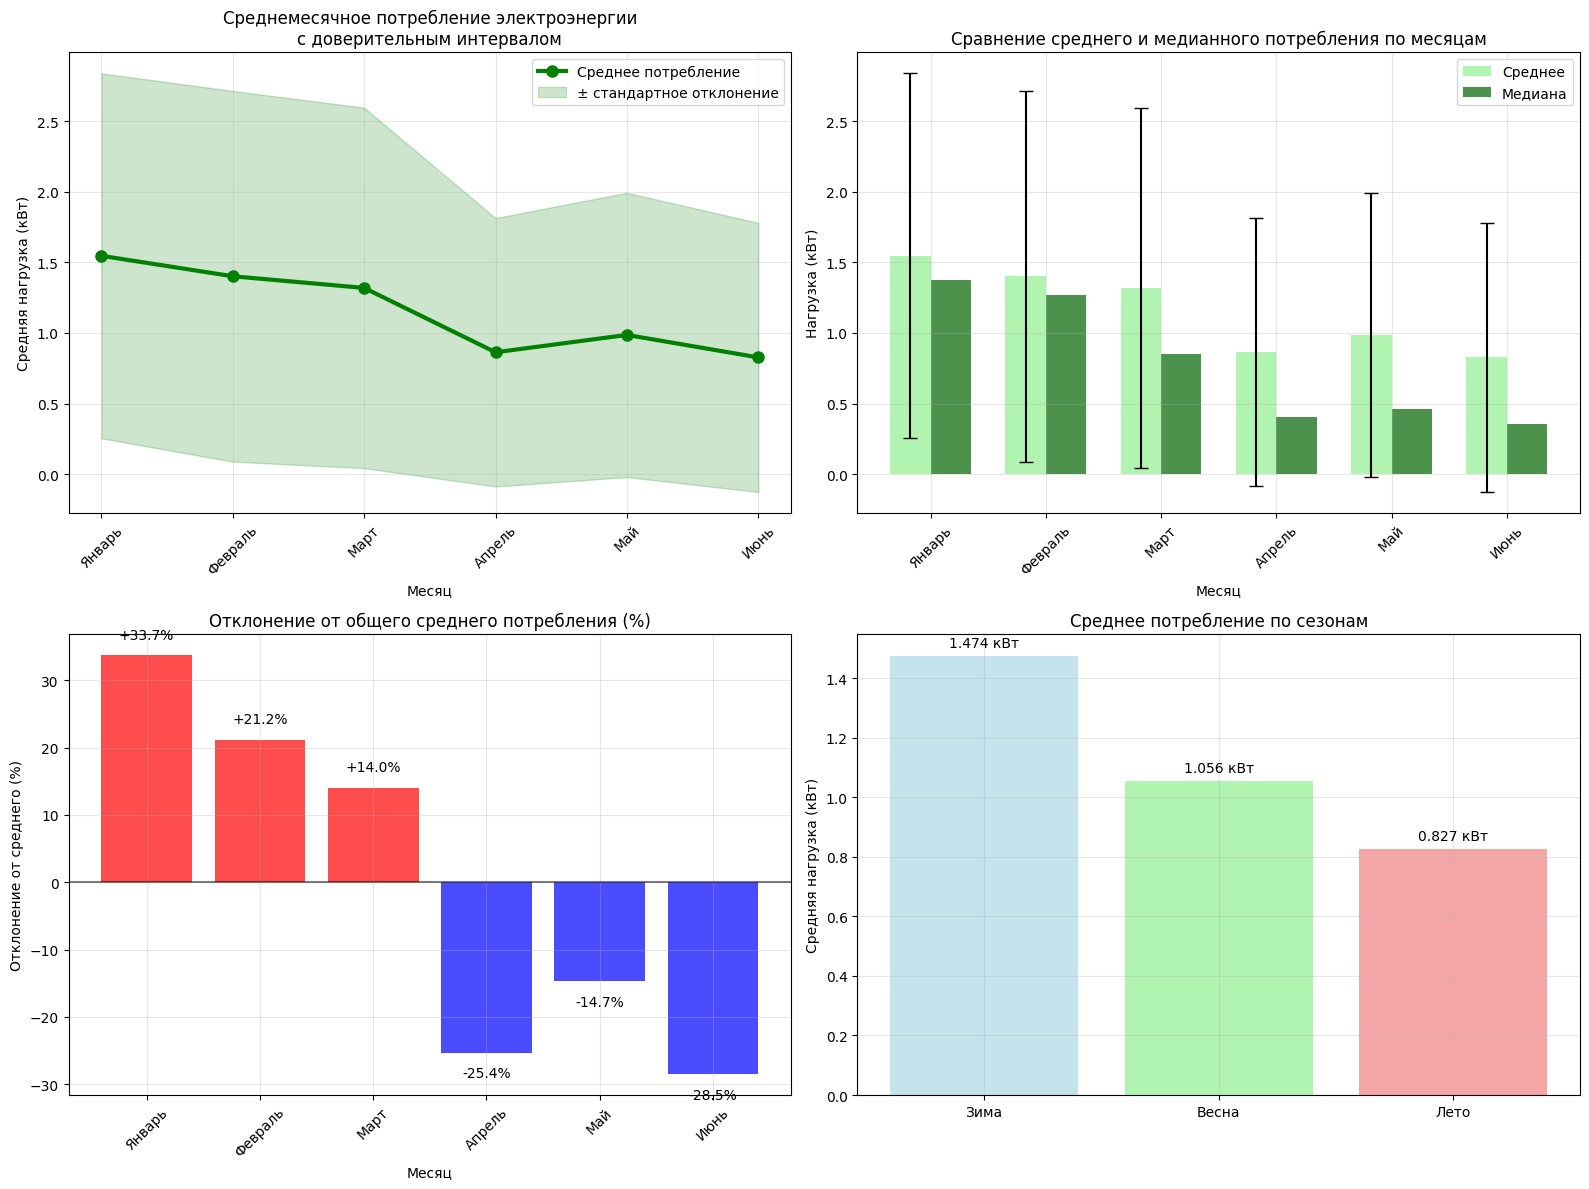

In [305]:
# –î–ï–¢–ê–õ–¨–ù–´–ô –ê–ù–ê–õ–ò–ó –ú–ï–°–Ø–ß–ù–û–ô –°–ï–ó–û–ù–ù–û–°–¢–ò
print("="*60)
print("–î–ï–¢–ê–õ–¨–ù–´–ô –ê–ù–ê–õ–ò–ó –ú–ï–°–Ø–ß–ù–û–ô –°–ï–ó–û–ù–ù–û–°–¢–ò")
print("="*60)

# –°–æ–∑–¥–∞–µ–º —Å–ª–æ–≤–∞—Ä—å –¥–ª—è –Ω–∞–∑–≤–∞–Ω–∏–π –º–µ—Å—è—Ü–µ–≤
months_map = {1: '–Ø–Ω–≤–∞—Ä—å', 2: '–§–µ–≤—Ä–∞–ª—å', 3: '–ú–∞—Ä—Ç', 4: '–ê–ø—Ä–µ–ª—å', 
              5: '–ú–∞–π', 6: '–ò—é–Ω—å', 7: '–ò—é–ª—å', 8: '–ê–≤–≥—É—Å—Ç',
              9: '–°–µ–Ω—Ç—è–±—Ä—å', 10: '–û–∫—Ç—è–±—Ä—å', 11: '–ù–æ—è–±—Ä—å', 12: '–î–µ–∫–∞–±—Ä—å'}

# –ì—Ä—É–ø–ø–∏—Ä—É–µ–º –ø–æ –º–µ—Å—è—Ü–∞–º –∏ —Å—á–∏—Ç–∞–µ–º —Ä–∞—Å—à–∏—Ä–µ–Ω–Ω—É—é —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É
monthly_stats = df.groupby('month')['Global_active_power'].agg([
    'mean', 'std', 'min', 'max', 'median', 'count'
])

print("–î–µ—Ç–∞–ª—å–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è –ø–æ –º–µ—Å—è—Ü–∞–º:")
print("–ú–µ—Å—è—Ü      –°—Ä–µ–¥–Ω–µ–µ   –ú–µ–¥–∏–∞–Ω–∞   –°—Ç–∞–Ω–¥.–æ—Ç–∫–ª   –ú–∏–Ω     –ú–∞–∫—Å    –ó–∞–ø–∏—Å–µ–π")
for month in monthly_stats.index:
    month_name = months_map[month]
    stats = monthly_stats.loc[month]
    print(f"{month_name:<10} {stats['mean']:.3f} –∫–í—Ç  {stats['median']:.3f} –∫–í—Ç  "
          f"¬±{stats['std']:.3f} –∫–í—Ç  {stats['min']:.2f} –∫–í—Ç  {stats['max']:.2f} –∫–í—Ç  "
          f"{stats['count']:,}")

# –ê–Ω–∞–ª–∏–∑ —ç–∫—Å—Ç—Ä–µ–º—É–º–æ–≤
min_month = monthly_stats['mean'].idxmin()
max_month = monthly_stats['mean'].idxmax()
min_consumption = monthly_stats['mean'].min()
max_consumption = monthly_stats['mean'].max()

print(f"\n=== –ö–õ–Æ–ß–ï–í–´–ï –¢–û–ß–ö–ò –ú–ï–°–Ø–ß–ù–û–ì–û –¶–ò–ö–õ–ê ===")
print(f"üìâ –ú–ò–ù–ò–ú–£–ú: {min_consumption:.3f} –∫–í—Ç –≤ {months_map[min_month]}")
print(f"üìà –ú–ê–ö–°–ò–ú–£–ú: {max_consumption:.3f} –∫–í—Ç –≤ {months_map[max_month]}")
print(f"üìä –†–ê–ó–ú–ê–•: {max_consumption - min_consumption:.3f} –∫–í—Ç")

# –ê–Ω–∞–ª–∏–∑ —Å–µ–∑–æ–Ω–Ω—ã—Ö –ø–∞—Ç—Ç–µ—Ä–Ω–æ–≤
print(f"\n=== –°–ï–ó–û–ù–ù–´–ô –ê–ù–ê–õ–ò–ó ===")
winter_months = [1, 2]    # –Ø–Ω–≤–∞—Ä—å, –§–µ–≤—Ä–∞–ª—å
spring_months = [3, 4, 5] # –ú–∞—Ä—Ç, –ê–ø—Ä–µ–ª—å, –ú–∞–π
summer_months = [6]       # –ò—é–Ω—å

winter_consumption = monthly_stats.loc[winter_months, 'mean'].mean()
spring_consumption = monthly_stats.loc[spring_months, 'mean'].mean()
summer_consumption = monthly_stats.loc[summer_months, 'mean'].mean()

print(f"‚ùÑÔ∏è  –ó–∏–º–Ω–∏–µ –º–µ—Å—è—Ü—ã: {winter_consumption:.3f} –∫–í—Ç")
print(f"üå∑ –í–µ—Å–µ–Ω–Ω–∏–µ –º–µ—Å—è—Ü—ã: {spring_consumption:.3f} –∫–í—Ç")
print(f"‚òÄÔ∏è  –õ–µ—Ç–Ω–∏–µ –º–µ—Å—è—Ü—ã: {summer_consumption:.3f} –∫–í—Ç")

winter_to_summer_diff = ((summer_consumption - winter_consumption) / winter_consumption) * 100
winter_to_spring_diff = ((spring_consumption - winter_consumption) / winter_consumption) * 100

print(f"üìà –ó–∏–º–∞ ‚Üí –õ–µ—Ç–æ: {winter_to_summer_diff:+.1f}%")
print(f"üìà –ó–∏–º–∞ ‚Üí –í–µ—Å–Ω–∞: {winter_to_spring_diff:+.1f}%")

# –ê–Ω–∞–ª–∏–∑ —Å—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç–∏ –ø–æ –º–µ—Å—è—Ü–∞–º
print(f"\n=== –ê–ù–ê–õ–ò–ó –°–¢–ê–ë–ò–õ–¨–ù–û–°–¢–ò –ü–û–¢–†–ï–ë–õ–ï–ù–ò–Ø ===")
cv_by_month = (monthly_stats['std'] / monthly_stats['mean']) * 100
most_stable_month = cv_by_month.idxmin()
most_variable_month = cv_by_month.idxmax()

print(f"üìä –ù–∞–∏–±–æ–ª–µ–µ —Å—Ç–∞–±–∏–ª—å–Ω—ã–π –º–µ—Å—è—Ü: {months_map[most_stable_month]} (CV: {cv_by_month[most_stable_month]:.1f}%)")
print(f"üìä –ù–∞–∏–±–æ–ª–µ–µ –∏–∑–º–µ–Ω—á–∏–≤—ã–π –º–µ—Å—è—Ü: {months_map[most_variable_month]} (CV: {cv_by_month[most_variable_month]:.1f}%)")

# –ê–Ω–∞–ª–∏–∑ —Ç—Ä–µ–Ω–¥–∞
print(f"\n=== –ê–ù–ê–õ–ò–ó –¢–†–ï–ù–î–ê ===")
months_ordered = sorted(monthly_stats.index)
trend_values = [monthly_stats.loc[month, 'mean'] for month in months_ordered]
trend_slope = (trend_values[-1] - trend_values[0]) / len(trend_values)

if trend_slope > 0:
    trend_direction = "—Ä–æ—Å—Ç"
else:
    trend_direction = "—Å–Ω–∏–∂–µ–Ω–∏–µ"

print(f"üìä –û–±—â–∏–π —Ç—Ä–µ–Ω–¥: {trend_direction} ({trend_slope:.3f} –∫–í—Ç/–º–µ—Å—è—Ü)")
print(f"üìä –ò–∑–º–µ–Ω–µ–Ω–∏–µ –∑–∞ –ø–µ—Ä–∏–æ–¥: {(trend_values[-1] - trend_values[0]) / trend_values[0] * 100:+.1f}%")

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plt.figure(figsize=(16, 12))

# –ì—Ä–∞—Ñ–∏–∫ 1: –û—Å–Ω–æ–≤–Ω–æ–π —Ç—Ä–µ–Ω–¥ —Å –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–º –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–º
plt.subplot(2, 2, 1)
months_list = [months_map[i] for i in monthly_stats.index]
plt.plot(months_list, monthly_stats['mean'], marker='o', linewidth=3, markersize=8, 
         color='green', label='–°—Ä–µ–¥–Ω–µ–µ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ')
plt.fill_between(months_list, 
                 monthly_stats['mean'] - monthly_stats['std'],
                 monthly_stats['mean'] + monthly_stats['std'],
                 alpha=0.2, color='green', label='¬± —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ')
plt.title('–°—Ä–µ–¥–Ω–µ–º–µ—Å—è—á–Ω–æ–µ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ —ç–ª–µ–∫—Ç—Ä–æ—ç–Ω–µ—Ä–≥–∏–∏\n—Å –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–º –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–º')
plt.xlabel('–ú–µ—Å—è—Ü')
plt.ylabel('–°—Ä–µ–¥–Ω—è—è –Ω–∞–≥—Ä—É–∑–∫–∞ (–∫–í—Ç)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()

# –ì—Ä–∞—Ñ–∏–∫ 2: –°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Å—Ä–µ–¥–Ω–µ–≥–æ –∏ –º–µ–¥–∏–∞–Ω–Ω–æ–≥–æ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è
plt.subplot(2, 2, 2)
x_pos = np.arange(len(months_list))
width = 0.35

plt.bar(x_pos - width/2, monthly_stats['mean'], width, label='–°—Ä–µ–¥–Ω–µ–µ', 
        alpha=0.7, color='lightgreen', yerr=monthly_stats['std'], capsize=5)
plt.bar(x_pos + width/2, monthly_stats['median'], width, label='–ú–µ–¥–∏–∞–Ω–∞', 
        alpha=0.7, color='darkgreen')

plt.title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Å—Ä–µ–¥–Ω–µ–≥–æ –∏ –º–µ–¥–∏–∞–Ω–Ω–æ–≥–æ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è –ø–æ –º–µ—Å—è—Ü–∞–º')
plt.xlabel('–ú–µ—Å—è—Ü')
plt.ylabel('–ù–∞–≥—Ä—É–∑–∫–∞ (–∫–í—Ç)')
plt.xticks(x_pos, months_list, rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()

# –ì—Ä–∞—Ñ–∏–∫ 3: –û—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –æ—Ç –æ–±—â–µ–≥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ
plt.subplot(2, 2, 3)
overall_mean = df['Global_active_power'].mean()
relative_to_mean = (monthly_stats['mean'] / overall_mean - 1) * 100

colors = ['red' if x > 0 else 'blue' for x in relative_to_mean]
bars = plt.bar(months_list, relative_to_mean, color=colors, alpha=0.7)

plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
plt.title('–û—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –æ—Ç –æ–±—â–µ–≥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è (%)')
plt.xlabel('–ú–µ—Å—è—Ü')
plt.ylabel('–û—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –æ—Ç —Å—Ä–µ–¥–Ω–µ–≥–æ (%)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# –î–æ–±–∞–≤–ª—è–µ–º –ø–æ–¥–ø–∏—Å–∏
for bar, value in zip(bars, relative_to_mean):
    plt.text(bar.get_x() + bar.get_width()/2, value + (2 if value > 0 else -2),
             f'{value:+.1f}%', ha='center', va='bottom' if value > 0 else 'top')

# –ì—Ä–∞—Ñ–∏–∫ 4: –°–µ–∑–æ–Ω–Ω—ã–µ –ø–∞—Ç—Ç–µ—Ä–Ω—ã
plt.subplot(2, 2, 4)
seasons = ['–ó–∏–º–∞', '–í–µ—Å–Ω–∞', '–õ–µ—Ç–æ']
season_means = [winter_consumption, spring_consumption, summer_consumption]
colors = ['lightblue', 'lightgreen', 'lightcoral']

bars = plt.bar(seasons, season_means, color=colors, alpha=0.7)
plt.title('–°—Ä–µ–¥–Ω–µ–µ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ –ø–æ —Å–µ–∑–æ–Ω–∞–º')
plt.ylabel('–°—Ä–µ–¥–Ω—è—è –Ω–∞–≥—Ä—É–∑–∫–∞ (–∫–í—Ç)')
plt.grid(True, alpha=0.3)

# –î–æ–±–∞–≤–ª—è–µ–º –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ —Å—Ç–æ–ª–±—Ü—ã
for bar, mean_val in zip(bars, season_means):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f'{mean_val:.3f} –∫–í—Ç', ha='center', va='bottom')

plt.tight_layout()
plt.show()

–î–ï–¢–ê–õ–¨–ù–´–ô –ê–ù–ê–õ–ò–ó –í–†–ï–ú–ï–ù–ù–û–ì–û –†–Ø–î–ê
–ê–Ω–∞–ª–∏–∑ –≤—ã–±—Ä–∞–Ω–Ω–æ–π –Ω–µ–¥–µ–ª–∏ (1-7 –º–∞—Ä—Ç–∞ 2007):
–ü–µ—Ä–∏–æ–¥: 2007-03-01 00:00:00 - 2007-03-07 23:59:00
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π: 10,080
–°—Ä–µ–¥–Ω–µ–µ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ –∑–∞ –Ω–µ–¥–µ–ª—é: 1.014 –∫–í—Ç
–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ: 10.670 –∫–í—Ç
–ú–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ: 0.202 –∫–í—Ç

=== –ü–û–¢–†–ï–ë–õ–ï–ù–ò–ï –ü–û –î–ù–Ø–ú –í–´–ë–†–ê–ù–ù–û–ô –ù–ï–î–ï–õ–ò ===
–ü–æ–Ω–µ–¥–µ–ª—å–Ω–∏–∫: 1.847 –∫–í—Ç (–º–∞–∫—Å: 9.49 –∫–í—Ç, –º–∏–Ω: 0.21 –∫–í—Ç)
–í—Ç–æ—Ä–Ω–∏–∫: 0.866 –∫–í—Ç (–º–∞–∫—Å: 6.51 –∫–í—Ç, –º–∏–Ω: 0.20 –∫–í—Ç)
–°—Ä–µ–¥–∞: 1.649 –∫–í—Ç (–º–∞–∫—Å: 5.98 –∫–í—Ç, –º–∏–Ω: 0.20 –∫–í—Ç)
–ß–µ—Ç–≤–µ—Ä–≥: 0.359 –∫–í—Ç (–º–∞–∫—Å: 1.47 –∫–í—Ç, –º–∏–Ω: 0.21 –∫–í—Ç)
–ü—è—Ç–Ω–∏—Ü–∞: 0.358 –∫–í—Ç (–º–∞–∫—Å: 1.47 –∫–í—Ç, –º–∏–Ω: 0.21 –∫–í—Ç)
–°—É–±–±–æ—Ç–∞: 0.569 –∫–í—Ç (–º–∞–∫—Å: 4.24 –∫–í—Ç, –º–∏–Ω: 0.21 –∫–í—Ç)
–í–æ—Å–∫—Ä–µ—Å–µ–Ω—å–µ: 1.452 –∫–í—Ç (–º–∞–∫—Å: 10.

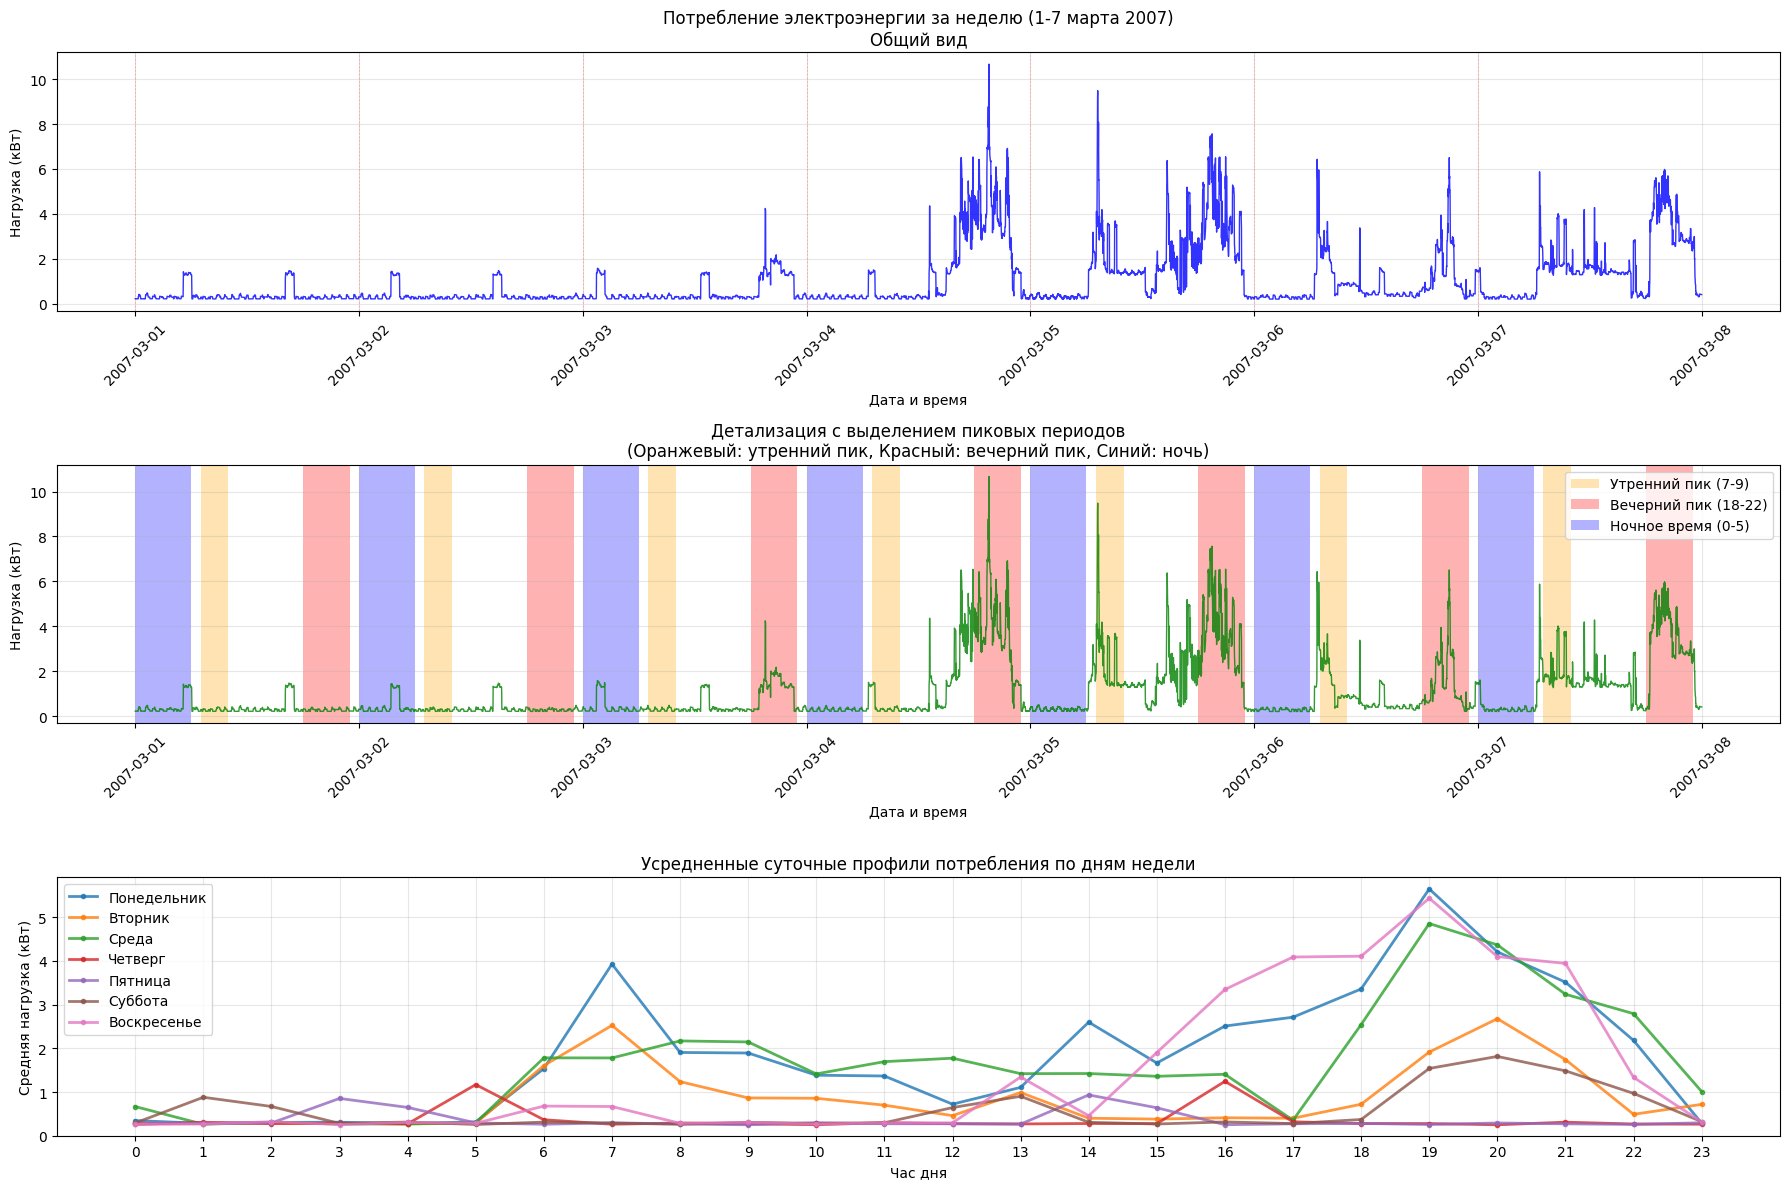


=== –ê–ù–ê–õ–ò–ó –ü–ê–¢–¢–ï–†–ù–û–í –ü–û–¢–†–ï–ë–õ–ï–ù–ò–Ø ===
–°–∞–º—ã–µ –≤—ã—Å–æ–∫–∏–µ –ø–∏–∫–∏ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è –∑–∞ –Ω–µ–¥–µ–ª—é:
  2007-03-04 19:34:00: 10.67 –∫–í—Ç
  2007-03-04 19:33:00: 10.65 –∫–í—Ç
  2007-03-04 19:32:00: 10.15 –∫–í—Ç
  2007-03-04 19:35:00: 9.92 –∫–í—Ç
  2007-03-05 07:13:00: 9.49 –∫–í—Ç

–ü–µ—Ä–∏–æ–¥—ã –≤—ã—Å–æ–∫–æ–≥–æ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è (> 3.0 –∫–í—Ç):
  –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π: 882
  –û–±—â–∞—è –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å: 882 –º–∏–Ω—É—Ç
  –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω–æ–≥–æ –≤—ã—Å–æ–∫–æ–≥–æ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è: ...

–ü–µ—Ä–∏–æ–¥—ã –Ω–∏–∑–∫–æ–≥–æ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è (< 0.3 –∫–í—Ç):
  –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π: 3397
  –û–±—â–∞—è –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å: 3397 –º–∏–Ω—É—Ç

=== –ê–ù–ê–õ–ò–ó –ü–ï–†–ï–•–û–î–ù–´–• –ü–†–û–¶–ï–°–°–û–í ===
–†–µ–∑–∫–∏–µ —É–≤–µ–ª–∏—á–µ–Ω–∏—è –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è (> +1.0 –∫–í—Ç/–º–∏–Ω): 115
–†–µ–∑–∫–∏–µ —É–º–µ–Ω—å—à–µ–Ω–∏—è –ø–æ—Ç—Ä–µ

In [306]:
# –î–ï–¢–ê–õ–¨–ù–´–ô –ê–ù–ê–õ–ò–ó –í–†–ï–ú–ï–ù–ù–û–ì–û –†–Ø–î–ê
print("="*60)
print("–î–ï–¢–ê–õ–¨–ù–´–ô –ê–ù–ê–õ–ò–ó –í–†–ï–ú–ï–ù–ù–û–ì–û –†–Ø–î–ê")
print("="*60)

# –í—ã–±–∏—Ä–∞–µ–º –Ω–µ–¥–µ–ª—é –¥–ª—è –¥–µ–º–æ–Ω—Å—Ç—Ä–∞—Ü–∏–∏ (1-7 –º–∞—Ä—Ç–∞ 2007)
sample_week = df['2007-03-01':'2007-03-07']

print("–ê–Ω–∞–ª–∏–∑ –≤—ã–±—Ä–∞–Ω–Ω–æ–π –Ω–µ–¥–µ–ª–∏ (1-7 –º–∞—Ä—Ç–∞ 2007):")
print(f"–ü–µ—Ä–∏–æ–¥: {sample_week.index.min()} - {sample_week.index.max()}")
print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π: {len(sample_week):,}")
print(f"–°—Ä–µ–¥–Ω–µ–µ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ –∑–∞ –Ω–µ–¥–µ–ª—é: {sample_week['Global_active_power'].mean():.3f} –∫–í—Ç")
print(f"–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ: {sample_week['Global_active_power'].max():.3f} –∫–í—Ç")
print(f"–ú–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ: {sample_week['Global_active_power'].min():.3f} –∫–í—Ç")

# –ê–Ω–∞–ª–∏–∑ –ø–æ –¥–Ω—è–º –Ω–µ–¥–µ–ª–∏ –≤ –≤—ã–±—Ä–∞–Ω–Ω–æ–π –Ω–µ–¥–µ–ª–µ
print(f"\n=== –ü–û–¢–†–ï–ë–õ–ï–ù–ò–ï –ü–û –î–ù–Ø–ú –í–´–ë–†–ê–ù–ù–û–ô –ù–ï–î–ï–õ–ò ===")
daily_stats_week = sample_week.groupby('day_of_week')['Global_active_power'].agg(['mean', 'max', 'min'])
for day in sorted(daily_stats_week.index):
    day_name = days_map[day]
    stats = daily_stats_week.loc[day]
    print(f"{day_name}: {stats['mean']:.3f} –∫–í—Ç (–º–∞–∫—Å: {stats['max']:.2f} –∫–í—Ç, –º–∏–Ω: {stats['min']:.2f} –∫–í—Ç)")

# –ê–Ω–∞–ª–∏–∑ –ø–∏–∫–æ–≤—ã—Ö –ø–µ—Ä–∏–æ–¥–æ–≤ –≤ –≤—ã–±—Ä–∞–Ω–Ω–æ–π –Ω–µ–¥–µ–ª–µ
print(f"\n=== –ü–ò–ö–û–í–´–ï –ü–ï–†–ò–û–î–´ –í –í–´–ë–†–ê–ù–ù–û–ô –ù–ï–î–ï–õ–ï ===")
morning_peak_week = sample_week[sample_week['is_morning_peak'] == 1]['Global_active_power'].mean()
evening_peak_week = sample_week[sample_week['is_evening_peak'] == 1]['Global_active_power'].mean()
night_week = sample_week[sample_week['is_night'] == 1]['Global_active_power'].mean()

print(f"üåÖ –£—Ç—Ä–µ–Ω–Ω–∏–π –ø–∏–∫ (7-9): {morning_peak_week:.3f} –∫–í—Ç")
print(f"üåá –í–µ—á–µ—Ä–Ω–∏–π –ø–∏–∫ (18-22): {evening_peak_week:.3f} –∫–í—Ç")
print(f"üåô –ù–æ—á–Ω–æ–µ –≤—Ä–µ–º—è (0-5): {night_week:.3f} –∫–í—Ç")

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plt.figure(figsize=(18, 12))

# –ì—Ä–∞—Ñ–∏–∫ 1: –û–±—â–∏–π –≤–∏–¥ –Ω–µ–¥–µ–ª–∏
plt.subplot(3, 1, 1)
plt.plot(sample_week.index, sample_week['Global_active_power'], linewidth=1, color='blue', alpha=0.8)
plt.title('–ü–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ —ç–ª–µ–∫—Ç—Ä–æ—ç–Ω–µ—Ä–≥–∏–∏ –∑–∞ –Ω–µ–¥–µ–ª—é (1-7 –º–∞—Ä—Ç–∞ 2007)\n–û–±—â–∏–π –≤–∏–¥')
plt.xlabel('–î–∞—Ç–∞ –∏ –≤—Ä–µ–º—è')
plt.ylabel('–ù–∞–≥—Ä—É–∑–∫–∞ (–∫–í—Ç)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# –î–æ–±–∞–≤–ª—è–µ–º –≤–µ—Ä—Ç–∏–∫–∞–ª—å–Ω—ã–µ –ª–∏–Ω–∏–∏ –¥–ª—è —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è –¥–Ω–µ–π
unique_days = sample_week.index.normalize().unique()
for day in unique_days:
    plt.axvline(x=day, color='red', linestyle='--', alpha=0.3, linewidth=0.5)

# –ì—Ä–∞—Ñ–∏–∫ 2: –î–µ—Ç–∞–ª–∏–∑–∞—Ü–∏—è —Å –≤—ã–¥–µ–ª–µ–Ω–∏–µ–º –ø–∏–∫–æ–≤—ã—Ö –ø–µ—Ä–∏–æ–¥–æ–≤
plt.subplot(3, 1, 2)
plt.plot(sample_week.index, sample_week['Global_active_power'], linewidth=1, color='green', alpha=0.8)

# –í—ã–¥–µ–ª—è–µ–º –ø–∏–∫–æ–≤—ã–µ –ø–µ—Ä–∏–æ–¥—ã —Ü–≤–µ—Ç–æ–º
for idx, row in sample_week.iterrows():
    if row['is_morning_peak'] == 1:
        plt.axvspan(idx, idx + pd.Timedelta(minutes=1), alpha=0.3, color='orange', linewidth=0)
    elif row['is_evening_peak'] == 1:
        plt.axvspan(idx, idx + pd.Timedelta(minutes=1), alpha=0.3, color='red', linewidth=0)
    elif row['is_night'] == 1:
        plt.axvspan(idx, idx + pd.Timedelta(minutes=1), alpha=0.3, color='blue', linewidth=0)

plt.title('–î–µ—Ç–∞–ª–∏–∑–∞—Ü–∏—è —Å –≤—ã–¥–µ–ª–µ–Ω–∏–µ–º –ø–∏–∫–æ–≤—ã—Ö –ø–µ—Ä–∏–æ–¥–æ–≤\n(–û—Ä–∞–Ω–∂–µ–≤—ã–π: —É—Ç—Ä–µ–Ω–Ω–∏–π –ø–∏–∫, –ö—Ä–∞—Å–Ω—ã–π: –≤–µ—á–µ—Ä–Ω–∏–π –ø–∏–∫, –°–∏–Ω–∏–π: –Ω–æ—á—å)')
plt.xlabel('–î–∞—Ç–∞ –∏ –≤—Ä–µ–º—è')
plt.ylabel('–ù–∞–≥—Ä—É–∑–∫–∞ (–∫–í—Ç)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# –î–æ–±–∞–≤–ª—è–µ–º –ª–µ–≥–µ–Ω–¥—É –¥–ª—è —Ü–≤–µ—Ç–æ–≤—ã—Ö –∑–æ–Ω
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='orange', alpha=0.3, label='–£—Ç—Ä–µ–Ω–Ω–∏–π –ø–∏–∫ (7-9)'),
    Patch(facecolor='red', alpha=0.3, label='–í–µ—á–µ—Ä–Ω–∏–π –ø–∏–∫ (18-22)'),
    Patch(facecolor='blue', alpha=0.3, label='–ù–æ—á–Ω–æ–µ –≤—Ä–µ–º—è (0-5)')
]
plt.legend(handles=legend_elements, loc='upper right')

# –ì—Ä–∞—Ñ–∏–∫ 3: –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –¥–Ω–µ–π –Ω–µ–¥–µ–ª–∏ (—É—Å—Ä–µ–¥–Ω–µ–Ω–Ω—ã–µ —Å—É—Ç–æ—á–Ω—ã–µ –ø—Ä–æ—Ñ–∏–ª–∏)
plt.subplot(3, 1, 3)

# –°–æ–∑–¥–∞–µ–º —É—Å—Ä–µ–¥–Ω–µ–Ω–Ω—ã–µ –ø—Ä–æ—Ñ–∏–ª–∏ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –¥–Ω—è –Ω–µ–¥–µ–ª–∏
for day in sorted(sample_week['day_of_week'].unique()):
    day_data = sample_week[sample_week['day_of_week'] == day]
    hourly_profile = day_data.groupby('hour')['Global_active_power'].mean()
    
    plt.plot(hourly_profile.index, hourly_profile.values, 
             marker='o', markersize=3, linewidth=2, 
             label=days_map[day], alpha=0.8)

plt.title('–£—Å—Ä–µ–¥–Ω–µ–Ω–Ω—ã–µ —Å—É—Ç–æ—á–Ω—ã–µ –ø—Ä–æ—Ñ–∏–ª–∏ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è –ø–æ –¥–Ω—è–º –Ω–µ–¥–µ–ª–∏')
plt.xlabel('–ß–∞—Å –¥–Ω—è')
plt.ylabel('–°—Ä–µ–¥–Ω—è—è –Ω–∞–≥—Ä—É–∑–∫–∞ (–∫–í—Ç)')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))
plt.legend()
plt.ylim(bottom=0)  # –ù–∞—á–∏–Ω–∞–µ–º —Å 0 –¥–ª—è –ª—É—á—à–µ–π –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏

plt.tight_layout()
plt.show()

# –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –ø–∞—Ç—Ç–µ—Ä–Ω–æ–≤
print(f"\n=== –ê–ù–ê–õ–ò–ó –ü–ê–¢–¢–ï–†–ù–û–í –ü–û–¢–†–ï–ë–õ–ï–ù–ò–Ø ===")

# –ù–∞—Ö–æ–¥–∏–º —Å–∞–º—ã–µ –≤—ã—Å–æ–∫–∏–µ –ø–∏–∫–∏ –∑–∞ –Ω–µ–¥–µ–ª—é
top_peaks = sample_week.nlargest(5, 'Global_active_power')[['Global_active_power']]
print("–°–∞–º—ã–µ –≤—ã—Å–æ–∫–∏–µ –ø–∏–∫–∏ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è –∑–∞ –Ω–µ–¥–µ–ª—é:")
for timestamp, row in top_peaks.iterrows():
    print(f"  {timestamp}: {row['Global_active_power']:.2f} –∫–í—Ç")

# –ê–Ω–∞–ª–∏–∑ –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –≤—ã—Å–æ–∫–æ–≥–æ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è
high_consumption_threshold = 3.0  # –∫–í—Ç
high_consumption_periods = sample_week[sample_week['Global_active_power'] > high_consumption_threshold]
print(f"\n–ü–µ—Ä–∏–æ–¥—ã –≤—ã—Å–æ–∫–æ–≥–æ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è (> {high_consumption_threshold} –∫–í—Ç):")
print(f"  –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π: {len(high_consumption_periods)}")
print(f"  –û–±—â–∞—è –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å: {len(high_consumption_periods)} –º–∏–Ω—É—Ç")
print(f"  –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω–æ–≥–æ –≤—ã—Å–æ–∫–æ–≥–æ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è: ...")

# –ê–Ω–∞–ª–∏–∑ –Ω–∏–∑–∫–æ–≥–æ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è
low_consumption_threshold = 0.3  # –∫–í—Ç
low_consumption_periods = sample_week[sample_week['Global_active_power'] < low_consumption_threshold]
print(f"\n–ü–µ—Ä–∏–æ–¥—ã –Ω–∏–∑–∫–æ–≥–æ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è (< {low_consumption_threshold} –∫–í—Ç):")
print(f"  –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π: {len(low_consumption_periods)}")
print(f"  –û–±—â–∞—è –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å: {len(low_consumption_periods)} –º–∏–Ω—É—Ç")

# –ê–Ω–∞–ª–∏–∑ –ø–µ—Ä–µ—Ö–æ–¥–Ω—ã—Ö –ø—Ä–æ—Ü–µ—Å—Å–æ–≤
print(f"\n=== –ê–ù–ê–õ–ò–ó –ü–ï–†–ï–•–û–î–ù–´–• –ü–†–û–¶–ï–°–°–û–í ===")
# –í—ã—á–∏—Å–ª—è–µ–º –∏–∑–º–µ–Ω–µ–Ω–∏—è –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è –º–µ–∂–¥—É —Å–æ—Å–µ–¥–Ω–∏–º–∏ –∏–∑–º–µ—Ä–µ–Ω–∏—è–º–∏
sample_week['power_change'] = sample_week['Global_active_power'].diff()
large_increases = sample_week[sample_week['power_change'] > 1.0]  # –†–µ–∑–∫–∏–µ —É–≤–µ–ª–∏—á–µ–Ω–∏—è > 1 –∫–í—Ç
large_decreases = sample_week[sample_week['power_change'] < -1.0]  # –†–µ–∑–∫–∏–µ —É–º–µ–Ω—å—à–µ–Ω–∏—è > 1 –∫–í—Ç

print(f"–†–µ–∑–∫–∏–µ —É–≤–µ–ª–∏—á–µ–Ω–∏—è –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è (> +1.0 –∫–í—Ç/–º–∏–Ω): {len(large_increases)}")
print(f"–†–µ–∑–∫–∏–µ —É–º–µ–Ω—å—à–µ–Ω–∏—è –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è (< -1.0 –∫–í—Ç/–º–∏–Ω): {len(large_decreases)}")

if len(large_increases) > 0:
    print(f"–°–∞–º–æ–µ —Ä–µ–∑–∫–æ–µ —É–≤–µ–ª–∏—á–µ–Ω–∏–µ: {large_increases['power_change'].max():.2f} –∫–í—Ç/–º–∏–Ω")
if len(large_decreases) > 0:
    print(f"–°–∞–º–æ–µ —Ä–µ–∑–∫–æ–µ —É–º–µ–Ω—å—à–µ–Ω–∏–µ: {large_decreases['power_change'].min():.2f} –∫–í—Ç/–º–∏–Ω")

–î–ï–¢–ê–õ–¨–ù–´–ô –ê–ù–ê–õ–ò–ó –ê–í–¢–û–ö–û–†–†–ï–õ–Ø–¶–ò–ò –í–†–ï–ú–ï–ù–ù–û–ì–û –†–Ø–î–ê
–ê–Ω–∞–ª–∏–∑ –¥–Ω–µ–≤–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö:
–ü–µ—Ä–∏–æ–¥: 2007-01-01 00:00:00 - 2007-06-30 00:00:00
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–Ω–µ–π: 181
–°—Ä–µ–¥–Ω–µ–µ –¥–Ω–µ–≤–Ω–æ–µ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ: 1.156 –∫–í—Ç
–°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ: 0.537 –∫–í—Ç

=== –ß–ò–°–õ–û–í–û–ô –ê–ù–ê–õ–ò–ó –ê–í–¢–û–ö–û–†–†–ï–õ–Ø–¶–ò–ò ===
–ê–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è (ACF):
–õ–∞–≥  –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è  –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è
 1   +0.4915    üìä –°—Ä–µ–¥–Ω—è—è
 7   +0.4008    üìä –°—Ä–µ–¥–Ω—è—è
14   +0.3065    üìä –°—Ä–µ–¥–Ω—è—è
21   +0.2607    üìâ –ù–∏–∑–∫–∞—è
30   +0.0613    üìâ –ù–∏–∑–∫–∞—è

–ß–∞—Å—Ç–∏—á–Ω–∞—è –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è (PACF):
–õ–∞–≥  –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è  –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è
 1   +0.4942    üìä –°—Ä–µ–¥–Ω—è—è
 2   +0.0281    üìâ –ù–∏–∑–∫–∞—è
 3   +0.3606    üìä –°—Ä–µ–¥–Ω—è—è
 7   +0.1191    üìâ –ù–∏–∑–∫–∞—è
14   +0.0792  

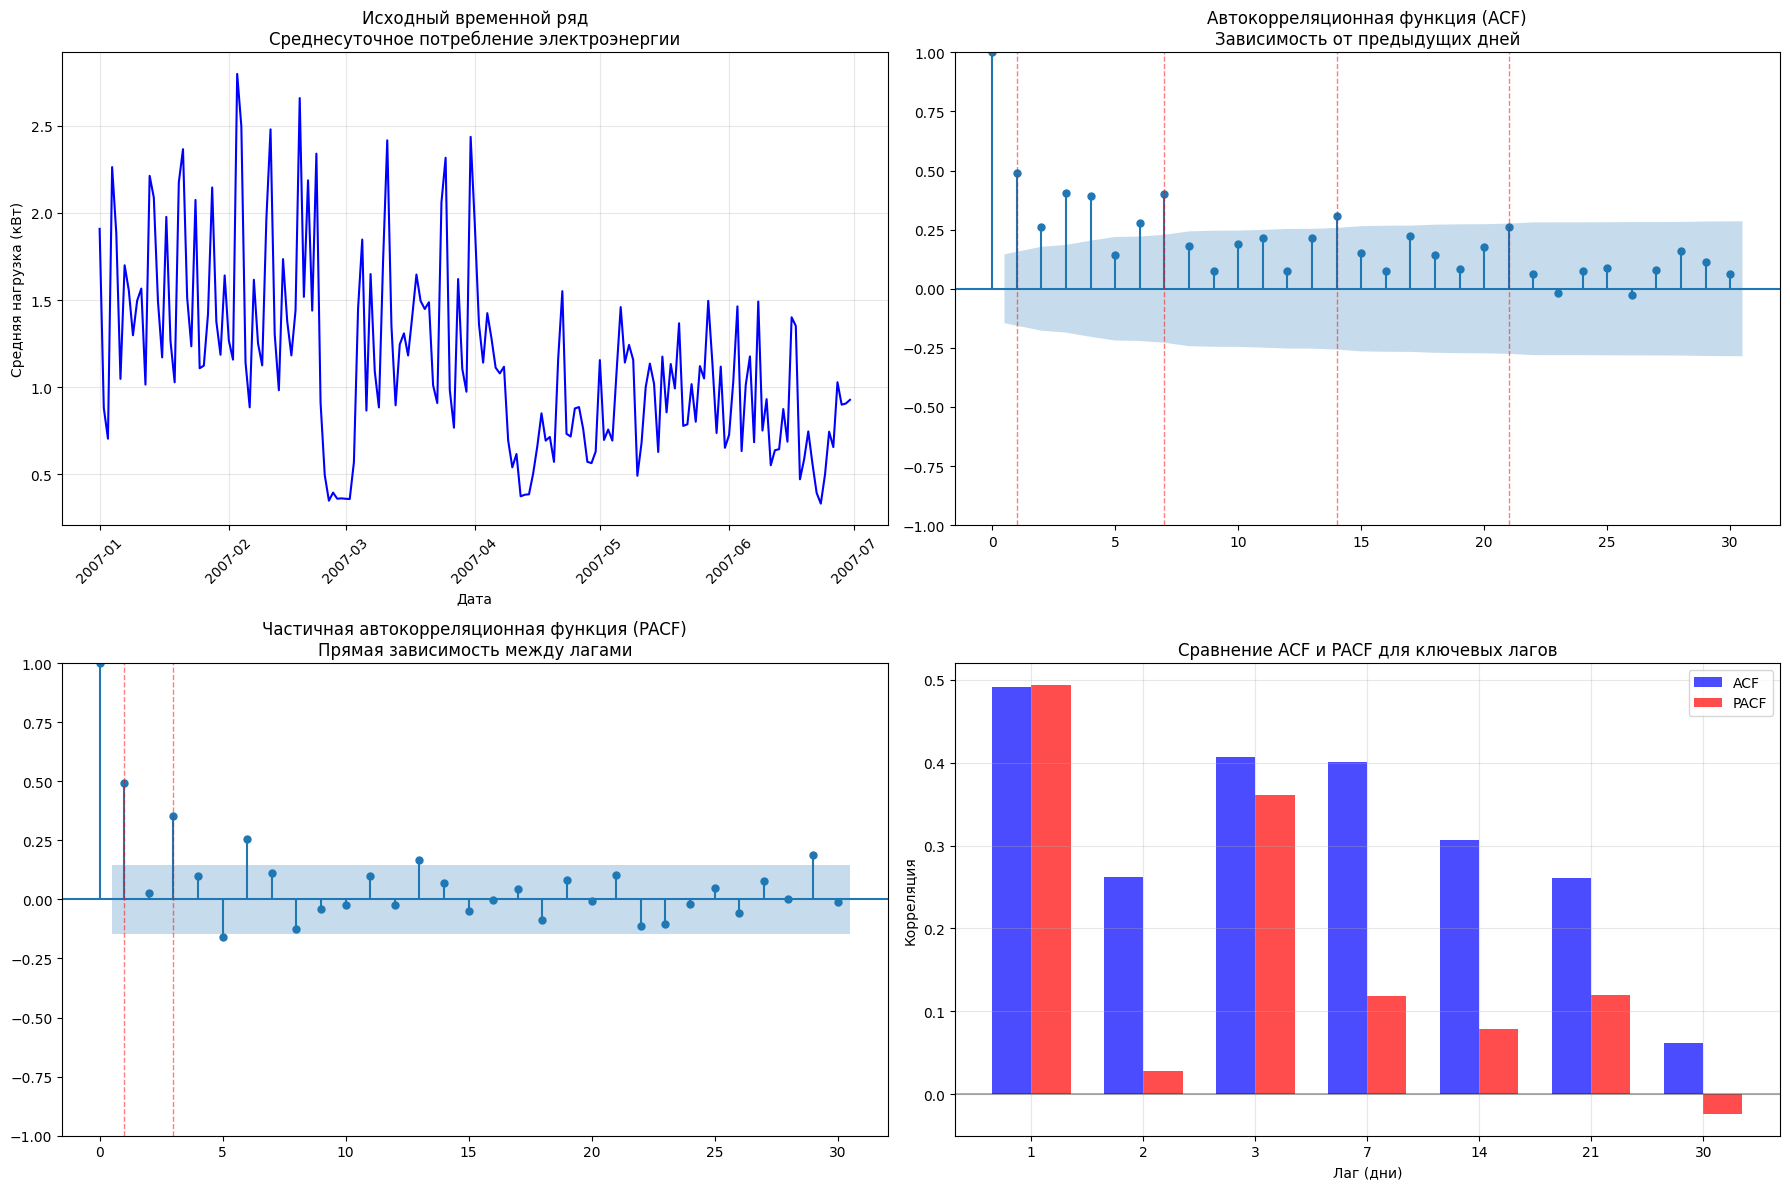

In [307]:
# –î–ï–¢–ê–õ–¨–ù–´–ô –ê–ù–ê–õ–ò–ó –ê–í–¢–û–ö–û–†–†–ï–õ–Ø–¶–ò–ò
print("="*60)
print("–î–ï–¢–ê–õ–¨–ù–´–ô –ê–ù–ê–õ–ò–ó –ê–í–¢–û–ö–û–†–†–ï–õ–Ø–¶–ò–ò –í–†–ï–ú–ï–ù–ù–û–ì–û –†–Ø–î–ê")
print("="*60)

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
import numpy as np

# –ë–µ—Ä–µ–º –¥–Ω–µ–≤–Ω—ã–µ —Å—Ä–µ–¥–Ω–∏–µ –¥–ª—è –ª—É—á—à–µ–π –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏
daily_data = df['Global_active_power'].resample('D').mean()

print("–ê–Ω–∞–ª–∏–∑ –¥–Ω–µ–≤–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö:")
print(f"–ü–µ—Ä–∏–æ–¥: {daily_data.index.min()} - {daily_data.index.max()}")
print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–Ω–µ–π: {len(daily_data)}")
print(f"–°—Ä–µ–¥–Ω–µ–µ –¥–Ω–µ–≤–Ω–æ–µ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ: {daily_data.mean():.3f} –∫–í—Ç")
print(f"–°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ: {daily_data.std():.3f} –∫–í—Ç")

# –í—ã—á–∏—Å–ª—è–µ–º —á–∏—Å–ª–æ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è ACF –∏ PACF
lags = 30
acf_values = acf(daily_data, nlags=lags)
pacf_values = pacf(daily_data, nlags=lags)

print(f"\n=== –ß–ò–°–õ–û–í–û–ô –ê–ù–ê–õ–ò–ó –ê–í–¢–û–ö–û–†–†–ï–õ–Ø–¶–ò–ò ===")
print("–ê–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è (ACF):")
print("–õ–∞–≥  –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è  –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è")
significant_lags_acf = []
for lag in [1, 7, 14, 21, 30]:
    if lag <= lags:
        correlation = acf_values[lag]
        interpretation = "‚úÖ –í—ã—Å–æ–∫–∞—è" if abs(correlation) > 0.5 else "üìä –°—Ä–µ–¥–Ω—è—è" if abs(correlation) > 0.3 else "üìâ –ù–∏–∑–∫–∞—è"
        if abs(correlation) > 0.2:  # –°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–∞—è
            significant_lags_acf.append(lag)
        print(f"{lag:2d}   {correlation:+.4f}    {interpretation}")

print(f"\n–ß–∞—Å—Ç–∏—á–Ω–∞—è –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è (PACF):")
print("–õ–∞–≥  –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è  –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è")
significant_lags_pacf = []
for lag in [1, 2, 3, 7, 14]:
    if lag <= lags:
        correlation = pacf_values[lag]
        interpretation = "‚úÖ –í—ã—Å–æ–∫–∞—è" if abs(correlation) > 0.5 else "üìä –°—Ä–µ–¥–Ω—è—è" if abs(correlation) > 0.3 else "üìâ –ù–∏–∑–∫–∞—è"
        if abs(correlation) > 0.2:  # –°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–∞—è
            significant_lags_pacf.append(lag)
        print(f"{lag:2d}   {correlation:+.4f}    {interpretation}")

# –ê–Ω–∞–ª–∏–∑ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏
print(f"\n=== –ê–ù–ê–õ–ò–ó –°–ï–ó–û–ù–ù–´–• –ü–ê–¢–¢–ï–†–ù–û–í ===")
weekly_seasonality = acf_values[7] if 7 <= lags else 0
if abs(weekly_seasonality) > 0.3:
    print(f"üìÖ –í—ã—Ä–∞–∂–µ–Ω–Ω–∞—è –Ω–µ–¥–µ–ª—å–Ω–∞—è —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å: ACF(7) = {weekly_seasonality:+.4f}")
else:
    print(f"üìÖ –°–ª–∞–±–∞—è –Ω–µ–¥–µ–ª—å–Ω–∞—è —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å: ACF(7) = {weekly_seasonality:+.4f}")

# –ê–Ω–∞–ª–∏–∑ –ø–∞–º—è—Ç–∏ –ø—Ä–æ—Ü–µ—Å—Å–∞
print(f"\n=== –ê–ù–ê–õ–ò–ó –ü–ê–ú–Ø–¢–ò –ü–†–û–¶–ï–°–°–ê ===")
if len(significant_lags_pacf) > 0:
    memory_length = max(significant_lags_pacf)
    print(f"üìä –ü—Ä–æ—Ü–µ—Å—Å –∏–º–µ–µ—Ç –ø–∞–º—è—Ç—å –ø—Ä–∏–º–µ—Ä–Ω–æ {memory_length} –¥–Ω–µ–π")
else:
    print(f"üìä –ü—Ä–æ—Ü–µ—Å—Å –∏–º–µ–µ—Ç –∫–æ—Ä–æ—Ç–∫—É—é –ø–∞–º—è—Ç—å (1-2 –¥–Ω—è)")

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plt.figure(figsize=(18, 12))

# –ì—Ä–∞—Ñ–∏–∫ 1: –ò—Å—Ö–æ–¥–Ω—ã–π –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥ (–¥–Ω–µ–≤–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ)
plt.subplot(2, 2, 1)
plt.plot(daily_data.index, daily_data.values, linewidth=1.5, color='blue')
plt.title('–ò—Å—Ö–æ–¥–Ω—ã–π –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥\n–°—Ä–µ–¥–Ω–µ—Å—É—Ç–æ—á–Ω–æ–µ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ —ç–ª–µ–∫—Ç—Ä–æ—ç–Ω–µ—Ä–≥–∏–∏')
plt.xlabel('–î–∞—Ç–∞')
plt.ylabel('–°—Ä–µ–¥–Ω—è—è –Ω–∞–≥—Ä—É–∑–∫–∞ (–∫–í—Ç)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# –ì—Ä–∞—Ñ–∏–∫ 2: –ê–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è (ACF)
plt.subplot(2, 2, 2)
plot_acf(daily_data, lags=30, ax=plt.gca(), alpha=0.05, 
         title='–ê–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è (ACF)\n–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –æ—Ç –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö –¥–Ω–µ–π')

# –í—ã–¥–µ–ª—è–µ–º –∑–Ω–∞—á–∏–º—ã–µ –ª–∞–≥–∏
for lag in significant_lags_acf:
    if lag > 0:  # –ü—Ä–æ–ø—É—Å–∫–∞–µ–º lag 0
        plt.axvline(x=lag, color='red', linestyle='--', alpha=0.5, linewidth=1)

# –ì—Ä–∞—Ñ–∏–∫ 3: –ß–∞—Å—Ç–∏—á–Ω–∞—è –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è (PACF)
plt.subplot(2, 2, 3)
plot_pacf(daily_data, lags=30, ax=plt.gca(), alpha=0.05,
          title='–ß–∞—Å—Ç–∏—á–Ω–∞—è –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è (PACF)\n–ü—Ä—è–º–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –º–µ–∂–¥—É –ª–∞–≥–∞–º–∏')

# –í—ã–¥–µ–ª—è–µ–º –∑–Ω–∞—á–∏–º—ã–µ –ª–∞–≥–∏
for lag in significant_lags_pacf:
    if lag > 0:  # –ü—Ä–æ–ø—É—Å–∫–∞–µ–º lag 0
        plt.axvline(x=lag, color='red', linestyle='--', alpha=0.5, linewidth=1)

# –ì—Ä–∞—Ñ–∏–∫ 4: –°—Ä–∞–≤–Ω–µ–Ω–∏–µ ACF –∏ PACF –¥–ª—è –∫–ª—é—á–µ–≤—ã—Ö –ª–∞–≥–æ–≤
plt.subplot(2, 2, 4)
key_lags = [1, 2, 3, 7, 14, 21, 30]
acf_key = [acf_values[lag] for lag in key_lags if lag <= lags]
pacf_key = [pacf_values[lag] for lag in key_lags if lag <= lags]

x_pos = np.arange(len(key_lags[:len(acf_key)]))
width = 0.35

plt.bar(x_pos - width/2, acf_key, width, label='ACF', alpha=0.7, color='blue')
plt.bar(x_pos + width/2, pacf_key, width, label='PACF', alpha=0.7, color='red')

plt.title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ ACF –∏ PACF –¥–ª—è –∫–ª—é—á–µ–≤—ã—Ö –ª–∞–≥–æ–≤')
plt.xlabel('–õ–∞–≥ (–¥–Ω–∏)')
plt.ylabel('–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è')
plt.xticks(x_pos, key_lags[:len(acf_key)])
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

–¢–µ–ø–ª–æ–≤–∞—è –∫–∞—Ä—Ç–∞ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏:


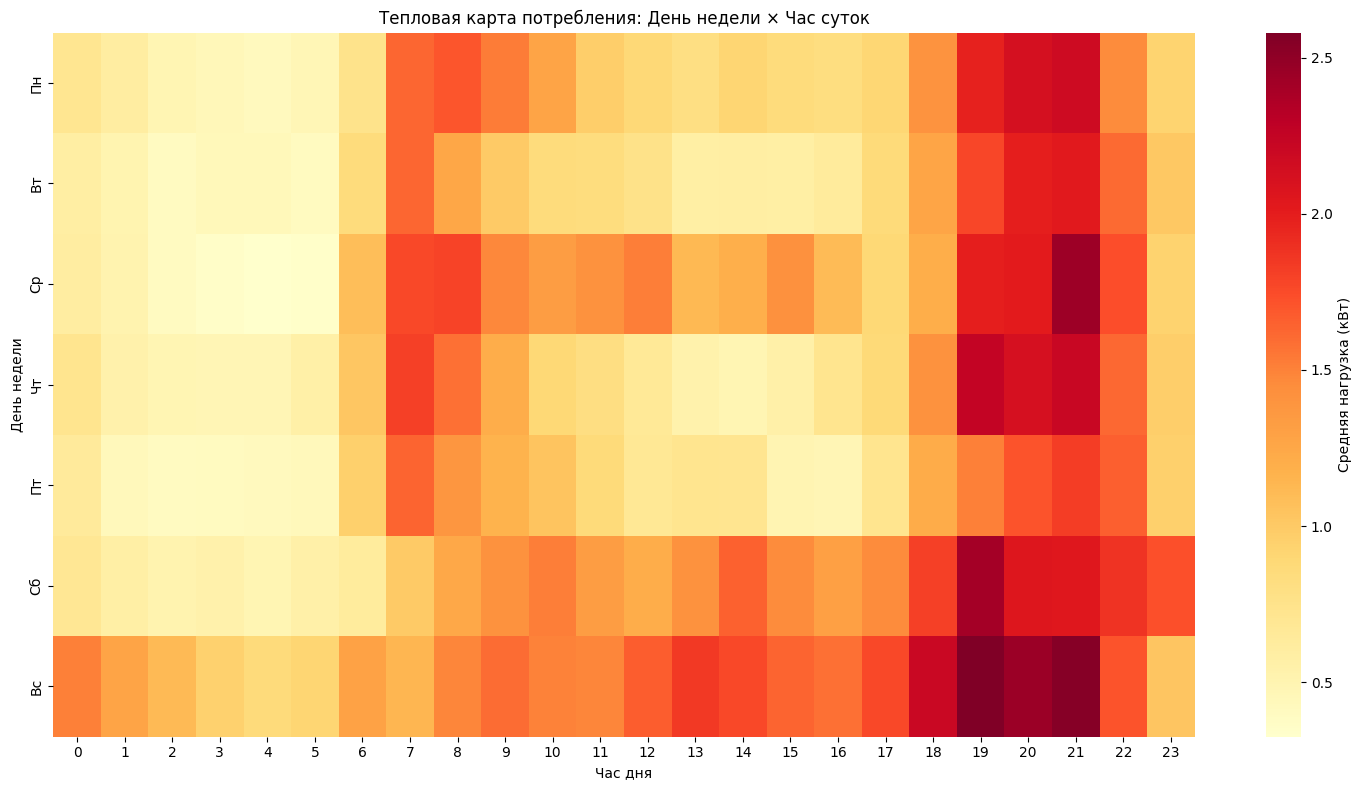

In [310]:
# –°–æ–∑–¥–∞–µ–º —Ç–µ–ø–ª–æ–≤—É—é –∫–∞—Ä—Ç—É "—á–∞—Å –¥–Ω—è √ó –¥–µ–Ω—å –Ω–µ–¥–µ–ª–∏"
print("–¢–µ–ø–ª–æ–≤–∞—è –∫–∞—Ä—Ç–∞ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏:")

# –ì—Ä—É–ø–ø–∏—Ä—É–µ–º –ø–æ —á–∞—Å—É –∏ –¥–Ω—é –Ω–µ–¥–µ–ª–∏
heatmap_data = df.groupby(['day_of_week', 'hour'])['Global_active_power'].mean().unstack()

plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, 
            cmap='YlOrRd', 
            annot=False,  # –ú–æ–∂–Ω–æ –ø–æ—Å—Ç–∞–≤–∏—Ç—å True –µ—Å–ª–∏ —Ö–æ—Ç–∏—Ç–µ —á–∏—Å–ª–∞
            cbar_kws={'label': '–°—Ä–µ–¥–Ω—è—è –Ω–∞–≥—Ä—É–∑–∫–∞ (–∫–í—Ç)'})
plt.title('–¢–µ–ø–ª–æ–≤–∞—è –∫–∞—Ä—Ç–∞ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è: –î–µ–Ω—å –Ω–µ–¥–µ–ª–∏ √ó –ß–∞—Å —Å—É—Ç–æ–∫')
plt.xlabel('–ß–∞—Å –¥–Ω—è')
plt.ylabel('–î–µ–Ω—å –Ω–µ–¥–µ–ª–∏')
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], 
           labels=['–ü–Ω', '–í—Ç', '–°—Ä', '–ß—Ç', '–ü—Ç', '–°–±', '–í—Å'])
plt.tight_layout()
plt.show()